## PREPARATION

### PATHS

In [4]:
import os
os.chdir('/Code/ditto_v2')
%pwd

'c:\\Code\\ditto_v2'

In [5]:
from src.functionality_maps import f_maps, paths
import geopandas as gpd

### INPUTS

In [6]:
l_country_data = [
    # 'D1','D2','D3',
    'D4',
    # 'ZIP',
    'census'
    ]
l_coverage = '20'

# l_stores = ['sportscheck', 'decathlon','intersport','sport2000','sportxx','karstadt','engelhorn','sportarena','sportcheck','sportsohle]
l_stores = ['decathlon']

# l_states = ['Bayern','Baden-Württemberg','Hessen','Nordrhein-Westfalen','Rheinland-Pfalz', \
#             'Saarland','Sachsen','Sachsen-Anhalt','Thüringen','Berlin','Brandenburg','Mecklenburg-Vorpommern', \
#                 'Hamburg','Niedersachsen','Schleswig-Holstein','Bremen']
l_states = ['Baden-Württemberg']

is_logging = True
round_dec = 2

### LOAD DATA (`d_ger`, `gpd_zensus`)

In [7]:
########## LOAD 'GERMANY' `d_ger` ##############
import pandas as pd

pd.set_option('display.max_columns', None)
d_ger = f_maps.load_germany(l_levels=l_country_data,
                            is_logging=True)

gpd_zensus = d_ger['census']
# print(d_ger['D4'].shape)
# d_ger['D4'].head()
gpd_zensus.head(1)

Level [D4-District] loaded!
Census is loaded!


OBJID     BEGINN  ADE  GF  BSG           ARS       AGS  \
0  DEBKGVG200000008 2022-12-20    6   4    1  010010000000  01001000   

        SDV_ARS        GEN    BEZ  IBZ        BEM NBD SN_L SN_R SN_K SN_V1  \
0  010010000000  Flensburg  Stadt   60  kreisfrei  ja   01    0   01    00   

  SN_V2 SN_G FK_S3   NUTS         ARS_0     AGS_0        WSK    EWZ  KFL  \
0    00  000     R  DEF01  010010000000  01001000 2008-01-01  92550   56   

             DLM_ID          EPK  EPK_norm  \
0  DEBKGDL20000E5MA  1652.678571       0.0   

                                            geometry  
0  POLYGON ((9.41266 54.82264, 9.41318 54.82124, ...

### ADJUST DATA (`gpd_zensus`, `radius_km`)

In [8]:
#### GPD_ZENSUS ########
print('Removing non-serializable columns...')
l_cols_non_serializable = ['WSK','BEGINN']
for col in l_cols_non_serializable:
    if col in gpd_zensus.columns:
        gpd_zensus = gpd_zensus.drop(col,axis=1)
        if(is_logging):
            print(f' Removing [{col}]')
gpd_zensus.head(1)

#### PARSING VARIABLES ###
radius_km = int(l_coverage)

Removing non-serializable columns...
 Removing [WSK]
 Removing [BEGINN]


### FILTERING BASED ON DATA 
[`pdf_stores`: with Store data

`gpd_ger_filt`: with geometry data

`gpd_zensus_filt`: with Population data
]

In [9]:
pdf_stores = pd.read_json(paths.stores, orient='records', lines=True)
pdf_stores[pdf_stores['store'] == 'decathlon']

url                      name  active                          address  \
30   None                 Saarlouis     NaN            Im Hader 1, Saarlouis   
31   None               Neunkirchen     NaN     Zum Eisenwerk 1, Neunkirchen   
32   None         Karlsruhe-Durlach     NaN   Durlacher Allee 111, Karlsruhe   
33   None                    Passau     NaN  Äußere Spitalhofstr. 17, Passau   
34   None      München Unterföhring     NaN   Feringastraße 16, Unterföhring   
..    ...                       ...     ...                              ...   
114  None                 Rosenheim     NaN  Grubholzer Strasse 1, Rosenheim   
115  None                    Aachen     NaN        Breslauer Str. 35, Aachen   
116  None                  Elmshorn     NaN            Ramskamp 96, Elmshorn   
117  None                Waiblingen     NaN           Ruhrstr. 5, Waiblingen   
118  None  Potsdam Bahnhofspassagen     NaN  Babelsberger Straße 10, Potsdam   

                                              location        lat        lon  \
30   {'address': 'IKEA, 1, Im Hader, Lisdorf, Saarl...  49.294467   6.759240   
31   {'address': 'Decathlon, 1, Zum Eisenwerk, Neun...  49.349534   7.171355   
32   {'address': 'Kaufland, 111, Durlacher Allee, O...  49.004886   8.449674   
33   {'address': '17, Äußere Spitalhofstraße, Haide...  48.571557  13.411107   
34   {'address': '16, Feringastraße, Unterföhring, ...  48.177236  11.636494   
..                                                 ...        ...        ...   
114  {'address': '1, Grubholzer Straße, Aicherpark/...  47.849629  12.090839   
115  {'address': '35, Breslauer Straße, Rothe Erde,...  50.783208   6.124446   
116  {'address': '96, Ramskamp, Elmshorn, Kreis Pin...  53.740898   9.707980   
117  {'address': 'Rems Park, 5, Ruhrstraße, Waiblin...  48.816872   9.300342   
118  {'address': 'UCI Potsdam | Luxe, 10, Babelsber...  52.392550  13.065490   

                                                  rect  \
30   {'locations': [[49.2934069, 6.757825], [49.295...   
31   {'locations': [[49.3491243, 7.1709312], [49.34...   
32   {'locations': [[49.0044623, 8.4489522], [49.00...   
33   {'locations': [[48.5713875, 13.4105258], [48.5...   
34   {'locations': [[48.1766125, 11.6357096], [48.1...   
..                                                 ...   
114  {'locations': [[47.8492556, 12.0890298], [47.8...   
115  {'locations': [[50.783158, 6.1243964], [50.783...   
116  {'locations': [[53.7405939, 9.7071569], [53.74...   
117  {'locations': [[48.8161173, 9.2996028], [48.81...   
118  {'locations': [[52.3925, 13.0654402], [52.3926...   

                                                marker  \
30   {'icon': {'color_options': ['darkred', 'lightr...   
31   {'icon': {'color_options': ['darkred', 'lightr...   
32   {'icon': {'color_options': ['darkred', 'lightr...   
33   {'icon': {'color_options': ['darkred', 'lightr...   
34   {'icon': {'color_options': ['darkred', 'lightr...   
..                                                 ...   
114  {'icon': {'color_options': ['darkred', 'lightr...   
115  {'icon': {'color_options': ['darkred', 'lightr...   
116  {'icon': {'color_options': ['darkred', 'lightr...   
117  {'icon': {'color_options': ['darkred', 'lightr...   
118  {'icon': {'color_options': ['darkred', 'lightr...   

                                                    fg  \
30   {'control': True, 'layer_name': '[007002130021...   
31   {'control': True, 'layer_name': '[007006770067...   
32   {'control': True, 'layer_name': '[007020560205...   
33   {'control': True, 'layer_name': '[007015990159...   
34   {'control': True, 'layer_name': '[007026010260...   
..                                                 ...   
114  {'control': True, 'layer_name': '[007026600266...   
115  {'control': True, 'layer_name': '[007030440304...   
116  {'control': True, 'layer_name': '[007031440314...   
117  {'control': True, 'layer_name': '[007031450314...   
118  {'control': True, 'layer_name': '[007033340333.

In [10]:
from src.functionality_maps import f_maps, paths, Defs
import pandas as pd
import geopandas as gpd

print('Filtering stores...')
pdf_stores = pd.read_json(paths.stores, orient='records', lines=True)
print(f'  Stores [{l_stores}]... # stores:{pdf_stores.shape[0]}')
pdf_stores = pdf_stores[pdf_stores['store'].isin(l_stores)]
print(f'  After filtering stores [{l_stores}]... # stores:{pdf_stores.shape[0]}')
pdf_stores = pdf_stores[pdf_stores['GADM_1'].isin(l_states)]
print(f'  After filtering states [{l_states}]... # stores:{pdf_stores.shape[0]}\n')
print(f'  Stores {list(pdf_stores['name'])}')

#### EXTRACTING LOCATIONS FROM STORES ####
l_center_points = list(zip(pdf_stores['lat'], pdf_stores['lon']))

Filtering stores...
  Stores [['decathlon']]... # stores:508
  After filtering stores [['decathlon']]... # stores:89
  After filtering states [['Baden-Württemberg']]... # stores:14

  Stores ['Karlsruhe-Durlach', 'Ulm', 'Plochingen', 'Baden - Baden', 'Aalen-Essingen', 'Schwetzingen', 'Böblingen', 'Lörrach', 'Ludwigsburg', 'Heilbronn-K3', 'Offenburg', 'Singen', 'Stuttgart-Milaneo', 'Waiblingen']


In [11]:
gpd_ger_d4 = d_ger["D4"]
l_bundeslaender = [Defs.dict_bundeslaender_id[x] for x in l_states]

#### FILTERING GEOMETRY #####
print('Filtering geometry...')
print(f'  gpd_ger_d4:{gpd_ger_d4.shape[0]}')
gpd_ger_filt = gpd_ger_d4[gpd_ger_d4['NAME_1'].isin(l_states)]
print(f'  After filtering States, gpd_ger_filt:{gpd_ger_filt.shape[0]}')

#### FILTERING CENSUS #####
print('Filtering census...')
print(f'  gdf_zensus_filt:{gpd_zensus.shape[0]}')
gpd_zensus_filt = gpd_zensus[gpd_zensus['SN_L'].isin(l_bundeslaender)]
print(f'  After filtering States, gdf_zensus_filt:{gpd_zensus_filt.shape[0]}')

Filtering geometry...
  gpd_ger_d4:434
  After filtering States, gpd_ger_filt:44
Filtering census...
  gdf_zensus_filt:10990
  After filtering States, gdf_zensus_filt:1103


## PROCESSING

### `gdf_geom_6933`
### `gdf_geom_4326`

In [12]:
#### COMPUTING AREAS ####
print('Computing areas...')
gdf_geom_6993 = gpd_zensus_filt.to_crs(epsg=6933)
gdf_geom_6993['KFL_GPD'] = round(gdf_geom_6993.geometry.area / 10**6, 2)


gdf_geom_4326 = gpd_zensus_filt.to_crs(epsg=4326)
gdf_geom_6993['centroid']=gdf_geom_6993.to_crs('+proj=cea').centroid.to_crs(gdf_geom_6993.crs)
gdf_geom_6993['centroid']= gdf_geom_6993['centroid'].to_crs(epsg=4326)
gdf_geom_6993['lat']=gdf_geom_6993['centroid'].y
gdf_geom_6993['lon']=gdf_geom_6993['centroid'].x

gdf_geom_6993.head(1)

Computing areas...


OBJID  ADE  GF  BSG           ARS       AGS       SDV_ARS  \
5198  DEBKGVG20000040K    6   4    1  081110000000  08111000  081110000000   

            GEN    BEZ  IBZ        BEM NBD SN_L SN_R SN_K SN_V1 SN_V2 SN_G  \
5198  Stuttgart  Stadt   60  kreisfrei  ja   08    1   11    00    00  000   

     FK_S3   NUTS         ARS_0     AGS_0     EWZ  KFL            DLM_ID  \
5198     R  DE111  081110000000  08111000  632865  207  DEBKGDL20000DZKQ   

              EPK  EPK_norm  \
5198  3057.318841       0.0   

                                               geometry  KFL_GPD  \
5198  POLYGON ((890102.993 5519238.077, 890086.186 5...   209.95   

                    centroid        lat       lon  
5198  POINT (9.172 48.77453)  48.774528  9.172003

## VISUALIZATION

### Feature Group Geometries (`fg_geom` using `gpd_ger_filt`)

In [13]:
import folium

fg_geom_d4 = folium.FeatureGroup(name=f'Geometry [{l_states}]')
gjson = f_maps.get_folium_geojson(gpd_ger_filt, 
                                fields=['NAME_3'],
                                aliases = ['Name']
                                )
gjson.add_to(fg_geom_d4)
print('Geometries ready!')
# d_ger['D4'].head(1)

Geometries ready!


### Feature Group Center points (`fg_point` using `pdf_stores`)

In [14]:
import folium
from src.functionality_maps import f_maps
from shapely import geometry

fg_points = f_maps.get_fg_markers(df=pdf_stores, 
                           name=f'Stores [{pdf_stores.shape[0]}]',
                           l_tooltip=['name', 'address'],
                           l_popup=['url'])

### Feature Group Circles (`fg_circles` using [`pdf_stores` and `radius_km`])

In [15]:
pdf_stores

url               name  active                             address  \
32   None  Karlsruhe-Durlach     NaN      Durlacher Allee 111, Karlsruhe   
44   None                Ulm     NaN             Blaubeurer Str. 95, Ulm   
45   None         Plochingen     NaN            Filsallee 19, Plochingen   
46   None      Baden - Baden     NaN          Neuer Markt 4, Baden Baden   
56   None     Aalen-Essingen     NaN  Margarete-Steiff-Str. 23, Essingen   
68   None       Schwetzingen     NaN    Grenzhöferstr. 100, Schwetzingen   
78   None          Böblingen     NaN  Wolfgang-Brumme-Allee 3, Böblingen   
83   None            Lörrach     NaN           Am Alten Markt 4, Lörrach   
85   None        Ludwigsburg     NaN      Marstallstrasse 1, Ludwigsburg   
102  None       Heilbronn-K3     NaN        Berliner Platz 12, Heilbronn   
103  None          Offenburg     NaN      Gustav-Ree Anlage 1, Offenburg   
106  None             Singen     NaN            Bahnhofstraße 29, Singen   
110  None  Stuttgart-Milaneo     NaN        Mailänder Platz 7, Stuttgart   
117  None         Waiblingen     NaN              Ruhrstr. 5, Waiblingen   

                                              location        lat        lon  \
32   {'address': 'Kaufland, 111, Durlacher Allee, O...  49.004886   8.449674   
44   {'address': 'Blautal-Center, 95, Blaubeurer St...  48.400781   9.958373   
45   {'address': 'Decathlon Plochingen, 19, Filsall...  48.702690   9.437393   
46   {'address': 'Decathlon, 4, Neuer Markt, Oos-We...  48.796577   8.195182   
56   {'address': 'Decathlon, 23, Margarete-Steiff-S...  48.820189  10.045626   
68   {'address': '100, Grenzhöfer Straße, Decathlon...  49.394163   8.577832   
78   {'address': '3, Wolfgang-Brumme-Allee, Böbling...  48.688291   9.009055   
83   {'address': 'REWE, 4, Am Alten Markt, Ufhabi, ...  47.610892   7.661844   
85   {'address': 'dm, 1, Marstallstraße, Ludwigsbur...  48.900043   9.191695   
102  {'address': 'Stadtbibliothek, 12, Berliner Pla...  49.146026   9.221438   
103  {'address': '1, Gustav-Rée-Anlage, Rée Carré, ...  48.472267   7.944426   
106  {'address': 'Nozomi Sushi & Vietfood, 29, Bahn...  47.759956   8.842021   
110  {'address': 'Milaneo, 7, Mailänder Platz, Euro...  48.791259   9.182105   
117  {'address': 'Rems Park, 5, Ruhrstraße, Waiblin...  48.816872   9.300342   

                                                  rect  \
32   {'locations': [[49.0044623, 8.4489522], [49.00...   
44   {'locations': [[48.4007313, 9.9583229], [48.40...   
45   {'locations': [[48.7022698, 9.4364976], [48.70...   
46   {'locations': [[48.7962417, 8.1946266], [48.79...   
56   {'locations': [[48.8198991, 10.0451704], [48.8...   
68   {'locations': [[49.3924977, 8.5764559], [49.39...   
78   {'locations': [[48.6882407, 9.0090054], [48.68...   
83   {'locations': [[47.6104732, 7.6613497], [47.61...   
85   {'locations': [[48.899993, 9.1916445], [48.900...   
102  {'locations': [[49.1459758, 9.2213879], [49.14...   
103  {'locations': [[48.4720288, 7.9439812], [48.47...   
106  {'locations': [[47.7599056, 8.8419714], [47.76...   
110  {'locations': [[48.7905513, 9.1815188], [48.79...   
117  {'locations': [[48.8161173, 9.2996028], [48.81...   

                                                marker  \
32   {'icon': {'color_options': ['darkred', 'lightr...   
44   {'icon': {'color_options': ['darkred', 'lightr...   
45   {'icon': {'color_options': ['darkred', 'lightr...   
46   {'icon': {'color_options': ['darkred', 'lightr...   
56   {'icon': {'color_options': ['darkred', 'lightr...   
68   {'icon': {'color_options': ['darkred', 'lightr...   
78   {'icon': {'color_options': ['darkred', 'lightr...   
83   {'icon': {'color_options': ['darkred', 'lightr...   
85   {'icon': {'color_options': ['darkred', 'lightr...   
102  {'icon': {'color_options': ['darkred', 'lightr...   
103  {'icon': {'color_options': ['darkred', 'lightr...   
106  {'icon': {'color_options': ['darkred', 'lightr...   
110  {'icon': {'color_options': ['darkr

In [16]:
import math
gdf_store_circles = f_maps.get_gdf_circle(df=pdf_stores, radius_km= radius_km)

num_stores = gdf_store_circles.shape[0]
area_circ = round(math.pi * radius_km**2, round_dec)

str_legend = f'[{num_stores}, radius={radius_km}Km, ' \
             f'area circle={area_circ}Km2]' \
             f'area total ={num_stores*area_circ}Km2'
# str_legend
fg_circles = folium.FeatureGroup(name=f'Circles {str_legend}')
gjson = f_maps.get_folium_geojson(gdf_store_circles, 
                                fields=['store','name', 'address'],
                                # aliases = ['Shop']
                                )
gjson.add_to(fg_circles)
# print(gdf_store_circles.columns)

# gdf_store_circles.head()

### Feature Group JOIN (`fg_join` using [`gdf_geom_4326` and `gdf_overlay`]

In [17]:
# gdf_intersection = gdf_store_circles.copy().set_crs(epsg=4326)
# gdf_circle_6933 = gdf_intersection.to_crs(epsg=6933)

In [18]:
# gdf_geom_4326.head(1)

############# JOIN ####################
gdf_join = gpd.sjoin(gdf_geom_4326, gdf_store_circles.to_crs(4326), how="inner", predicate="intersects")
gdf_join['KFL_GPD'] = round(gdf_geom_6993.to_crs(6933).geometry.area / 10**6, round_dec)

gdf_int_dd = gdf_join.drop_duplicates(subset=['OBJID'])
gdf_int_dd['KFL_GPD'] = round(gdf_int_dd.to_crs(6933).geometry.area / 10**6, round_dec)

### RELEVANT NUMBERS ###
int_gem = gdf_int_dd.shape[0]
int_ewz =gdf_join.EWZ.sum()
int_area_geom_nomerge = gdf_join.KFL_GPD.sum()
int_area_dbms_nomerge = gdf_join.KFL.sum()
int_area_geom_merge   = gdf_int_dd.KFL_GPD.sum()
int_area_dbms_merge   = gdf_int_dd.KFL.sum()

### MESSAGE ###
int_info_msg = f'# Towns={int_gem}, ' \
                f'# Area (geom, no merge)={int_area_geom_nomerge}Km2, ' \
                f'# Area (dbms, no merge)={int_area_dbms_nomerge}Km2, ' \
                f'Area (geom, merge)={int_area_geom_merge}Km2,' \
                f'Area (dbms, merge)={int_area_dbms_merge}Km2' \
                f'Pop={int_ewz}'

### FEATURE GROUP ###
fg_join = folium.FeatureGroup(name=f'Join/COMBINED [{int_info_msg}')
gjson = f_maps.get_folium_geojson(gdf_join, 
                                  fields=['GEN', 'EWZ', 'KFL', 'KFL_GPD'],
                                  aliases = ['Name', 'Population', 'Area_dbms', 'Area_Geom'])
gjson.add_to(fg_join)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


### Feature Group MERGE (`fg_merge` using [`gdf_intersection`, `gdf_overlay`])

In [ ]:
############# OVERLAY / individual ####################

col_perc = 'PERC_int'

gdf_geom_6993['area_geom'] = round(gdf_geom_6993['geometry'].area / 10**6, 2)
# Set the column used for NORMALIZATION (denominator)
gdf_intersection = gpd.overlay(gdf_geom_6993, gdf_store_circles.to_crs(6933), 
                               how='intersection')#.to_crs(4326)
            
# Set the column used for NORMALIZATION (numerator)
gdf_intersection['area'] = round(gdf_intersection['geometry'].area / 10**6, 2)
gdf_intersection[col_perc] = gdf_intersection['area'] / gdf_intersection['area_geom']


d_columns = {
    'area_geom':{'alias' : 'area',        'is_norm': True,  'is_int':False},
    'KFL':     {'alias' : 'area_data',    'is_norm': True,  'is_int':False},
    'EWZ':     {'alias' : 'Population',   'is_norm': True,  'is_int':True}
}

gdf_overlay = f_maps.overlay_shapes(gdf_circle=gdf_intersection,#.to_crs(4326), 
                                    col_perc=col_perc, 
                                    d_columns=d_columns)



l_cols_percentaged = ['area_geom', 'EWZ', 'KFL']
gdf_merge = f_maps.merge_shapes(gdf_overlay, l_col_percs=l_cols_percentaged,
                                d_percs={'data':'KFL', 'geom':'area_geom'}, 
                                num_dec=round_dec, is_logging=True)

gdf_overlay_dd = gdf_overlay.drop_duplicates(subset=['OBJID'])
gdf_merge['EWZ'] = gdf_overlay_dd.EWZ.sum()
gdf_merge['KFL'] = gdf_overlay_dd.KFL.sum()

msg_merge = f'area_geom={gdf_intersection["area_geom"].sum()}, ' \
              f'area_data={gdf_intersection["KFL_GPD"].sum()}, ' \
              f'area_int={gdf_intersection["area"].sum()}'

fg_over = folium.FeatureGroup(name=f'Merge [{msg_merge}')

# gdf_merge['num_in'] = gdf_inside.shape[0]
# gdf_merge['num_part'] = gdf_partly.shape[0]
gjson = f_maps.get_folium_geojson(gdf_merge, 
                                  fields=[
                                    'KFL_int', 'KFL', 'perc_data', 
                                    'area_geom_int', 'area_geom', 'perc_geom',
                                    'EWZ_int', 'EWZ',
                                    # 'num_in', 'num_part', 
                                    ],
                                  aliases = [
                                    'Area_dbms intersection [Km2]', 'Area_dbms shape [Km2]',
                                    'Percentage dbms', 
                                    'Area_geom intersection [Km2]', 'Area_geom shape [Km2]',
                                    'Percentage geometry',
                                    'Population intersection', 'Population shape',
                                    # '# Localities inside', 
                                    # '# Localities partially inside',
                                    ])
gjson.add_to(fg_over)


area_geom = 21669.34
area_geom_int = 15199.79
EWZ = 14515219
EWZ_int = 11152410
KFL = 21308
KFL_int = 14919.64
perc_data = 0.7
perc_geom = 0.7


In [ ]:

gdf_merge

geometry  area_geom  \
0  MULTIPOLYGON (((744213.134 5405581.493, 744093...   21669.34   

   area_geom_int      EWZ   EWZ_int    KFL   KFL_int  perc_data  perc_geom  
0       15199.79  7745903  11152410  15571  14919.64        0.7        0.7

### DISTANCES

In [38]:
gdf_geom_6993.head(1)

OBJID  ADE  GF  BSG           ARS       AGS       SDV_ARS  \
5198  DEBKGVG20000040K    6   4    1  081110000000  08111000  081110000000   

            GEN    BEZ  IBZ        BEM NBD SN_L SN_R SN_K SN_V1 SN_V2 SN_G  \
5198  Stuttgart  Stadt   60  kreisfrei  ja   08    1   11    00    00  000   

     FK_S3   NUTS         ARS_0     AGS_0     EWZ  KFL            DLM_ID  \
5198     R  DE111  081110000000  08111000  632865  207  DEBKGDL20000DZKQ   

              EPK  EPK_norm  \
5198  3057.318841       0.0   

                                               geometry  KFL_GPD  \
5198  POLYGON ((890102.993 5519238.077, 890086.186 5...   209.95   

                    centroid        lat       lon  area_geom  
5198  POINT (9.172 48.77453)  48.774528  9.172003     209.95

In [39]:
gdf_intersection.head(1)

OBJID  ADE  GF  BSG           ARS       AGS       SDV_ARS  \
0  DEBKGVG20000040K    6   4    1  081110000000  08111000  081110000000   

         GEN    BEZ  IBZ        BEM NBD SN_L SN_R SN_K SN_V1 SN_V2 SN_G FK_S3  \
0  Stuttgart  Stadt   60  kreisfrei  ja   08    1   11    00    00  000     R   

    NUTS         ARS_0     AGS_0     EWZ  KFL            DLM_ID          EPK  \
0  DE111  081110000000  08111000  632865  207  DEBKGDL20000DZKQ  3057.318841   

   EPK_norm  KFL_GPD                centroid      lat_1     lon_1  area_geom  \
0       0.0   209.95  POINT (9.172 48.77453)  48.774528  9.172003     209.95   

    url        name  active                   address  \
0  None  Plochingen     NaN  Filsallee 19, Plochingen   

                                            location     lat_2     lon_2  \
0  {'address': 'Decathlon Plochingen, 19, Filsall...  48.70269  9.437393   

                                                rect  \
0  {'locations': [[48.7022698, 9.4364976], [48.70...   

                                              marker  \
0  {'icon': {'color_options': ['darkred', 'lightr...   

                                                  fg  \
0  {'control': True, 'layer_name': '[007002450024...   

                                  point             GADM_1     GADM_2  \
0  POINT (9.437392619846309 48.7026898)  Baden-Württemberg  Stuttgart   

      GADM_3      GADM_4      store  \
0  Esslingen  Plochingen  decathlon   

                                            geometry   area  PERC_int  \
0  POLYGON ((891703.537 5515872.55, 891880.683 55...  74.46  0.354656   

   area_geom_int    KFL_int  EWZ_int  
0          74.46  73.413765   224449

In [40]:
gdf_merge.columns

Index(['geometry', 'area_geom', 'area_geom_int', 'EWZ', 'EWZ_int', 'KFL',
       'KFL_int', 'perc_data', 'perc_geom'],
      dtype='object')

In [41]:
l_center_points = list(zip(pdf_stores['lat'], pdf_stores['lon'], pdf_stores['store']+'_'+pdf_stores['name']))#_{pdf_stores['name']}'))
# l_center_points

# ################### Distance to point of interest ##########
gdf_dist = pd.DataFrame(gdf_intersection[['ARS','lat_1','lon_1','PERC_int','GEN']])
gdf_dist = gpd.GeoDataFrame(gdf_dist, crs='epsg:4326', 
                    geometry=[geometry.Point(xy) for xy in zip(gdf_dist['lon_1'], gdf_dist['lat_1'])])
for i,store_coords in enumerate(l_center_points):
    print(f'store_coords={store_coords}')
    gdf_dist = f_maps.compute_dist_to_lat_lon(gdf_dist, col_out=f'dist_{store_coords[2]}', 
                                              lon=store_coords[1], lat=store_coords[0], 
                                              round_dec=round_dec, units='km')

l_dist_cols = [col for col in gdf_dist.columns if col.startswith('dist_')]
gdf_dist['dist'] = gdf_dist[l_dist_cols].min(axis=1)
gdf_dist['dist_min_store'] = gdf_dist[l_dist_cols].idxmin(axis=1)
gdf_dist['dist_min_store'] = gdf_dist['dist_min_store'].apply(lambda x: x.replace('dist_',''))
gdf_dist

store_coords=(49.00488565, 8.449674128073184, 'decathlon_Karlsruhe-Durlach')
store_coords=(48.4007813, 9.9583729, 'decathlon_Ulm')
store_coords=(48.7026898, 9.437392619846309, 'decathlon_Plochingen')
store_coords=(48.7965766, 8.19518157114592, 'decathlon_Baden - Baden')
store_coords=(48.8201891, 10.045626348192611, 'decathlon_Aalen-Essingen')
store_coords=(49.3941626, 8.57783239839136, 'decathlon_Schwetzingen')
store_coords=(48.6882907, 9.0090554, 'decathlon_Böblingen')
store_coords=(47.610891699999996, 7.661843945356753, 'decathlon_Lörrach')
store_coords=(48.900043, 9.1916945, 'decathlon_Ludwigsburg')
store_coords=(49.1460258, 9.2214379, 'decathlon_Heilbronn-K3')
store_coords=(48.472267200000005, 7.944426365060242, 'decathlon_Offenburg')
store_coords=(47.7599556, 8.8420214, 'decathlon_Singen')
store_coords=(48.791258850000006, 9.182104646022687, 'decathlon_Stuttgart-Milaneo')
store_coords=(48.8168724, 9.300342163579177, 'decathlon_Waiblingen')


ARS      lat_1     lon_1  PERC_int         GEN  \
0    081110000000  48.774528  9.172003  0.354656   Stuttgart   
1    081110000000  48.774528  9.172003  0.785901   Stuttgart   
2    081110000000  48.774528  9.172003  0.853489   Stuttgart   
3    081110000000  48.774528  9.172003  1.000000   Stuttgart   
4    081110000000  48.774528  9.172003  0.997095   Stuttgart   
..            ...        ...       ...       ...         ...   
767  084265005028  48.231287  9.950261  0.810984  Burgrieden   
768  084265005070  48.227640  9.864039  0.323254    Laupheim   
769  084265009108  48.190639  9.978345  0.088523    Schwendi   
770  084355007053  47.798317  9.102492  0.466216  Sipplingen   
771  084355007059  47.796793  9.161327  0.080218  Überlingen   

                     geometry  dist_decathlon_Karlsruhe-Durlach  \
0      POINT (9.172 48.77453)                             58.84   
1      POINT (9.172 48.77453)                             58.84   
2      POINT (9.172 48.77453)                             58.84   
3      POINT (9.172 48.77453)                             58.84   
4      POINT (9.172 48.77453)                             58.84   
..                        ...                               ...   
767  POINT (9.95026 48.23129)                            140.14   
768  POINT (9.86404 48.22764)                            135.44   
769  POINT (9.97835 48.19064)                            144.60   
770  POINT (9.10249 47.79832)                            142.61   
771  POINT (9.16133 47.79679)                            144.30   

     dist_decathlon_Ulm  dist_decathlon_Plochingen  \
0                 71.36                      21.09   
1                 71.36                      21.09   
2                 71.36                      21.09   
3                 71.36                      21.09   
4                 71.36                      21.09   
..                  ...                        ...   
767               18.86                      64.70   
768               20.48                      61.53   
769               23.41                      69.60   
770               92.47                     103.59   
771               89.64                     102.80   

     dist_decathlon_Baden - Baden  dist_decathlon_Aalen-Essingen  \
0                           71.82                          64.38   
1                           71.82                          64.38   
2                           71.82                          64.38   
3                           71.82                          64.38   
4                           71.82                          64.38   
..                            ...                            ...   
767                        144.10                          65.86   
768                        138.58                          67.24   
769                        148.01                          70.18   
770                        129.82                         133.44   
771                        132.28                         131.35   

     dist_decathlon_Schwetzingen  dist_decathlon_Böblingen  \
0                          81.44                     15.35   
1                          81.44                     15.35   
2                          81.44                     15.35   
3                          81.44                     15.35   
4                          81.44                     15.35   
..                           ...                       ...   
767                       163.96                     86.19   
768                       160.47                     81.38   
769                       168.82                     90.58   
770                       181.63                     99.20   
771                       182.77                     99.77   

     dist_decathlon_Lörrach  dist_decathlon_Ludwigsburg  \
0                    171.30                       14.03   
1                    171.30                       14.03   
2                    171.30                       14

### TOWN MARKERS

In [55]:
#######################  Gemeinde Markers  ##########################

gdf_inside = gdf_dist[gdf_dist['dist'] <= radius_km]
num_inside_towns = gdf_inside.shape[0]
print(f'Inside ={ num_inside_towns}')

gdf_partly = gdf_dist[(gdf_dist['dist'] > radius_km)  & (gdf_dist[col_perc] != 1.0)]
num_partly_towns = gdf_partly.shape[0]
print(f'Partly ={num_partly_towns}')

print(f'Inside+Outside={num_inside_towns+ num_partly_towns}')
print(f'Total intersection={gdf_dist.shape[0]}')
print(f'Total Geom ={gdf_geom_4326.shape[0]}')

fg_inside_circle = f_maps.get_markers_polygon(gdf_inside,
                                        l_tooltip=['GEN','dist', 'dist_min_store'],
                                        col_lat='lat_1', col_lon='lon_1', 
                                        name=f'Markers inside {gdf_inside.shape[0]}', color='darkgreen')

fg_inside = folium.FeatureGroup(name=f'Markers - Inside towns [{num_inside_towns}, Pop:]')
fg_inside_circle.add_to(fg_inside)


fg_partly_circle = f_maps.get_markers_polygon(gdf_partly,
                                        l_tooltip=['GEN','dist', 'dist_min_store'], 
                                        col_lat='lat_1', col_lon='lon_1', 
                                        name=f'Markers partly {gdf_partly.shape[0]}', color='orange')
fg_partly = folium.FeatureGroup(name=f'Markers - Partly towns [{num_partly_towns}]')
fg_partly_circle.add_to(fg_partly)



Inside =668
Partly =104
Inside+Outside=772
Total intersection=772
Total Geom =1103


In [ ]:
# fg_inside.layer_name = fg_inside.layer_name + f'[{num_inside_towns}/{gpd_zensus_filt.shape[0]}]'
# fg_partly.layer_name = fg_partly.layer_name + f'[{num_partly_towns}/{gpd_zensus_filt.shape[0]}]'
# fg_int.layer_name = fg_int.layer_name + f'[Area={sum_int_kfl}, Area_Geom={round(sum_int_geom,round_dec)}, EWZ={sum_int_ewz} ]'


# MAPS


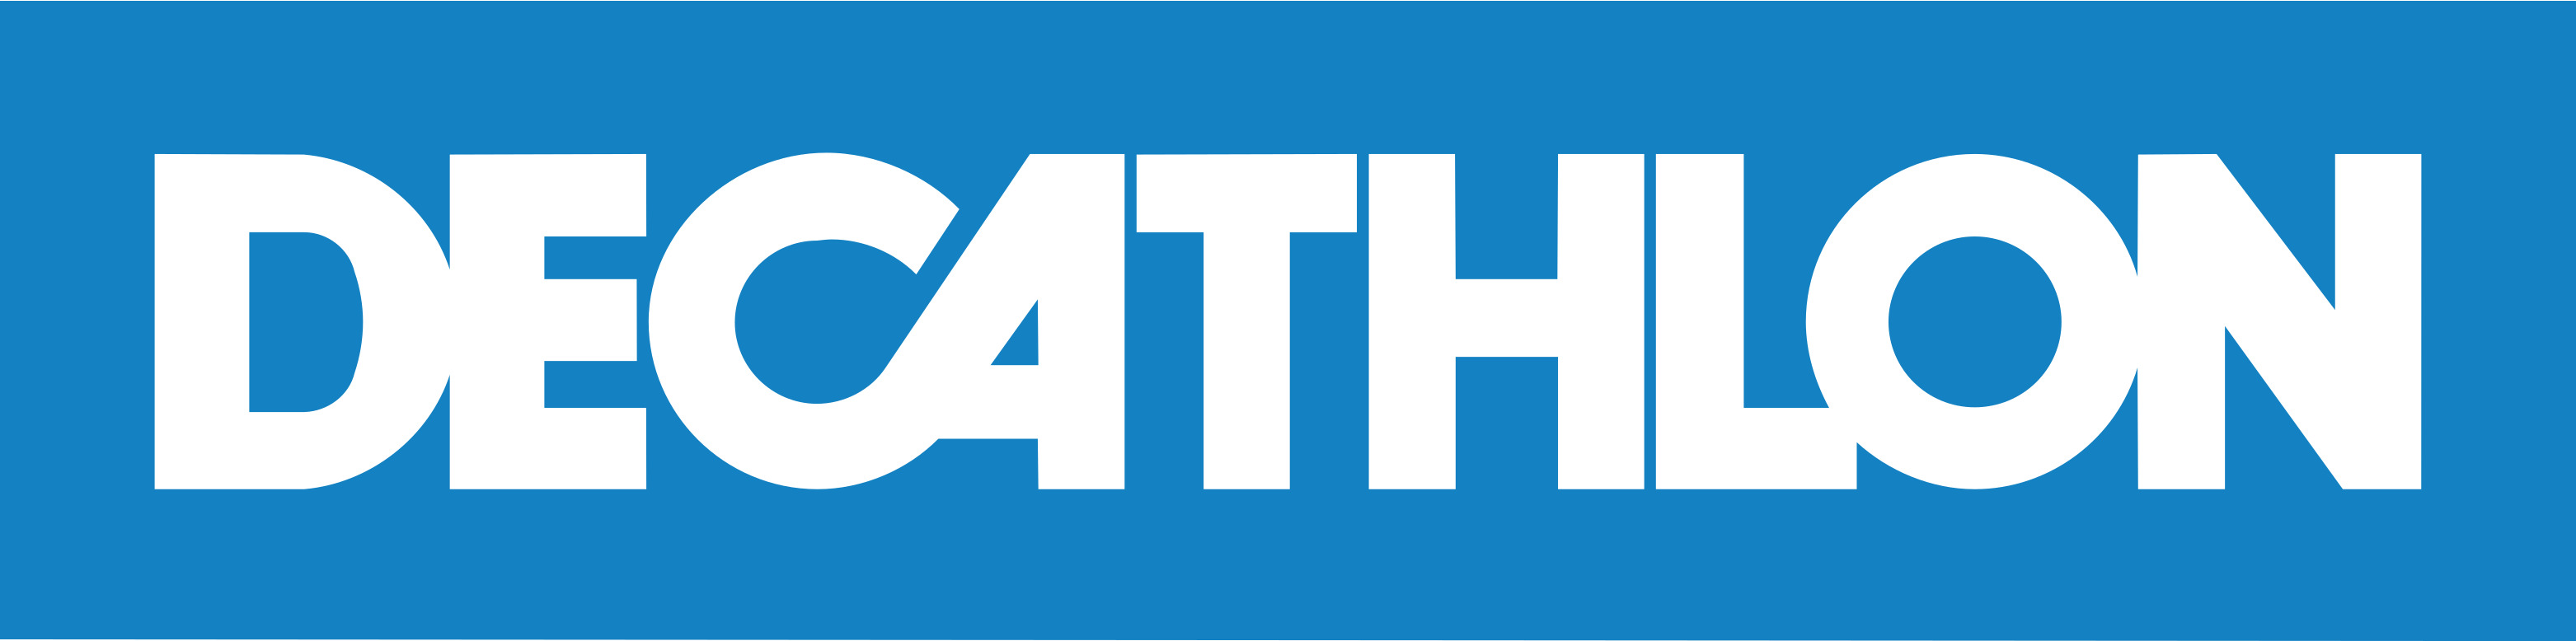
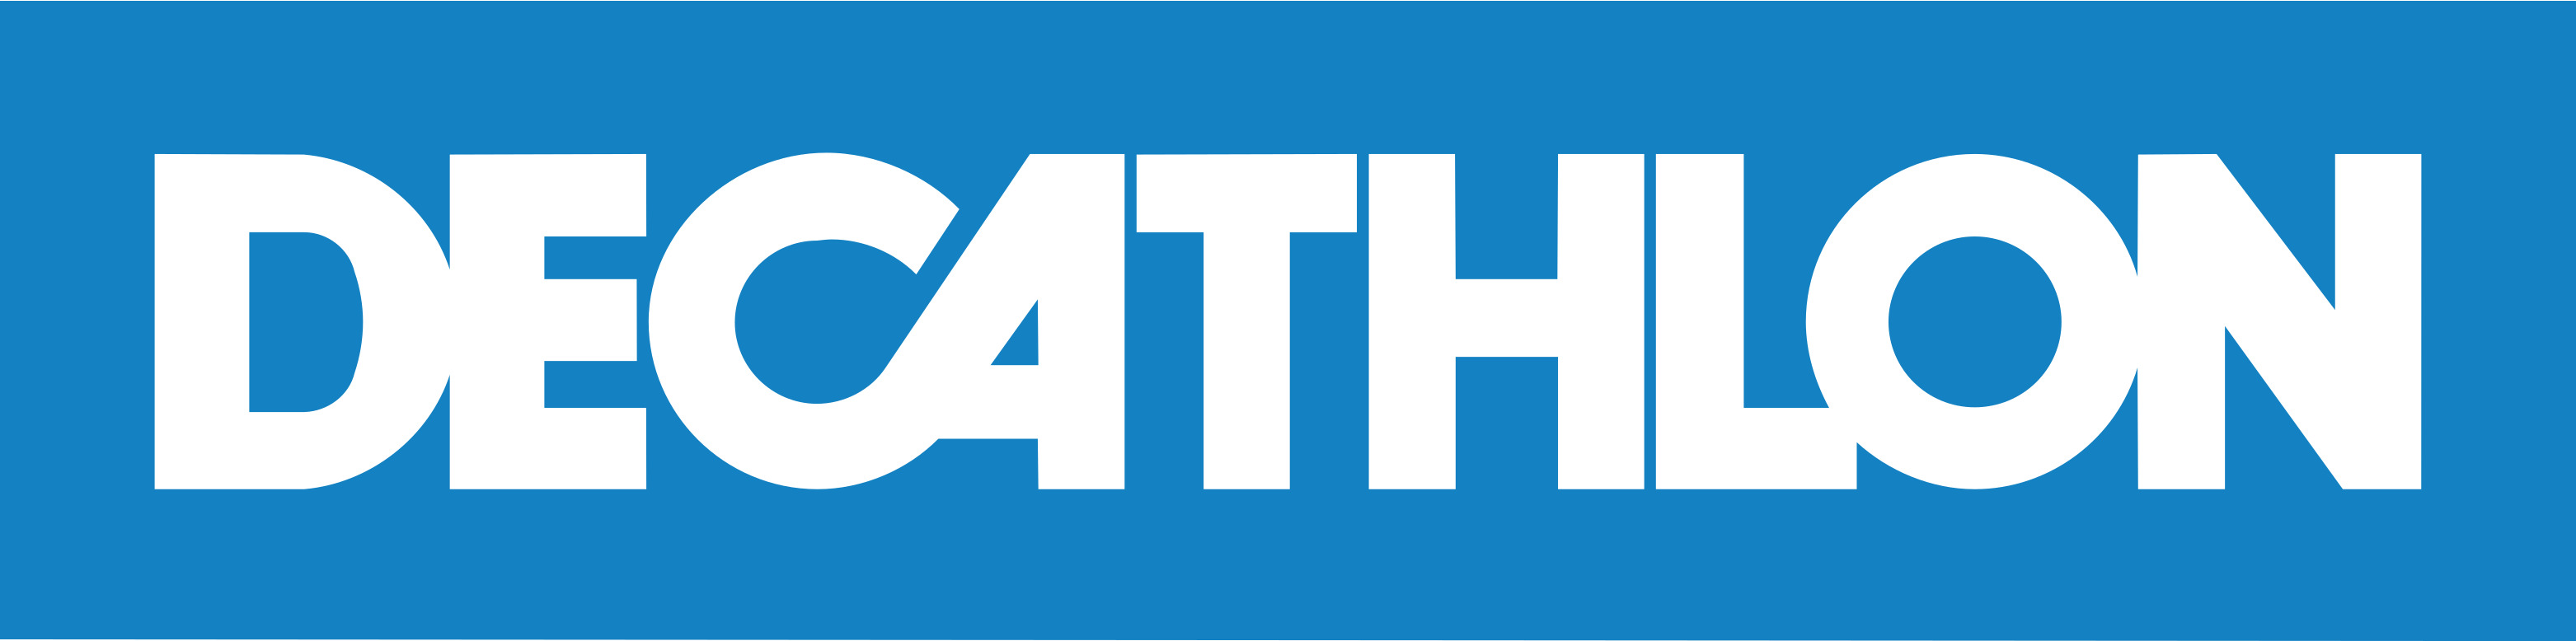
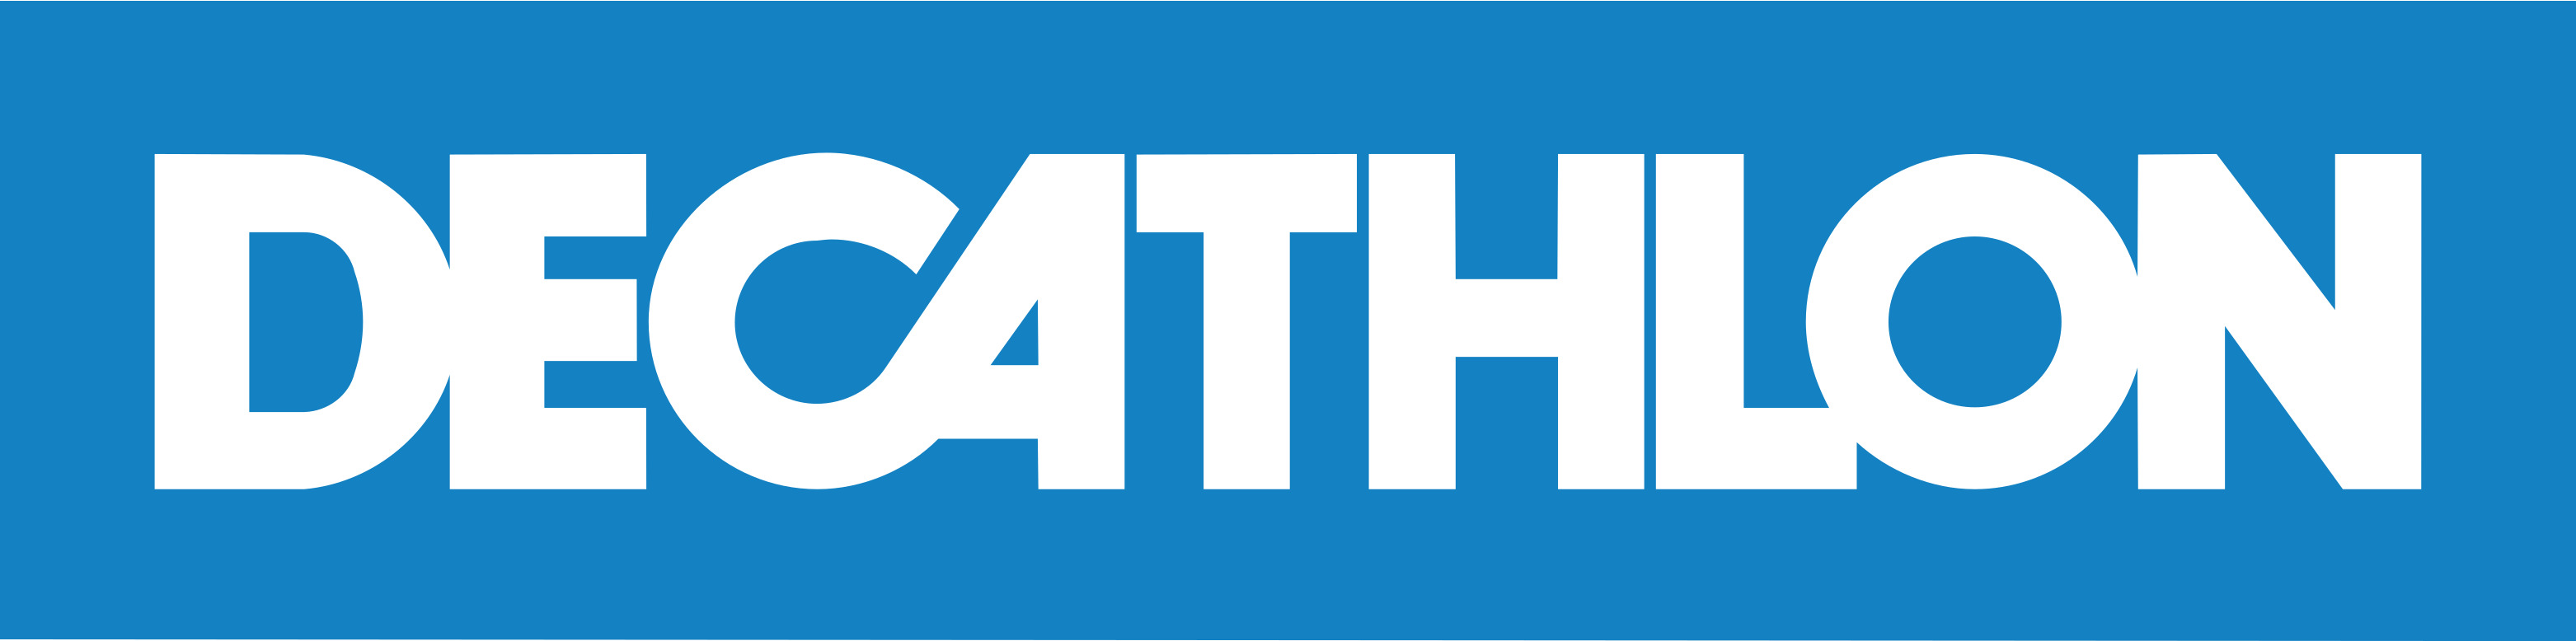
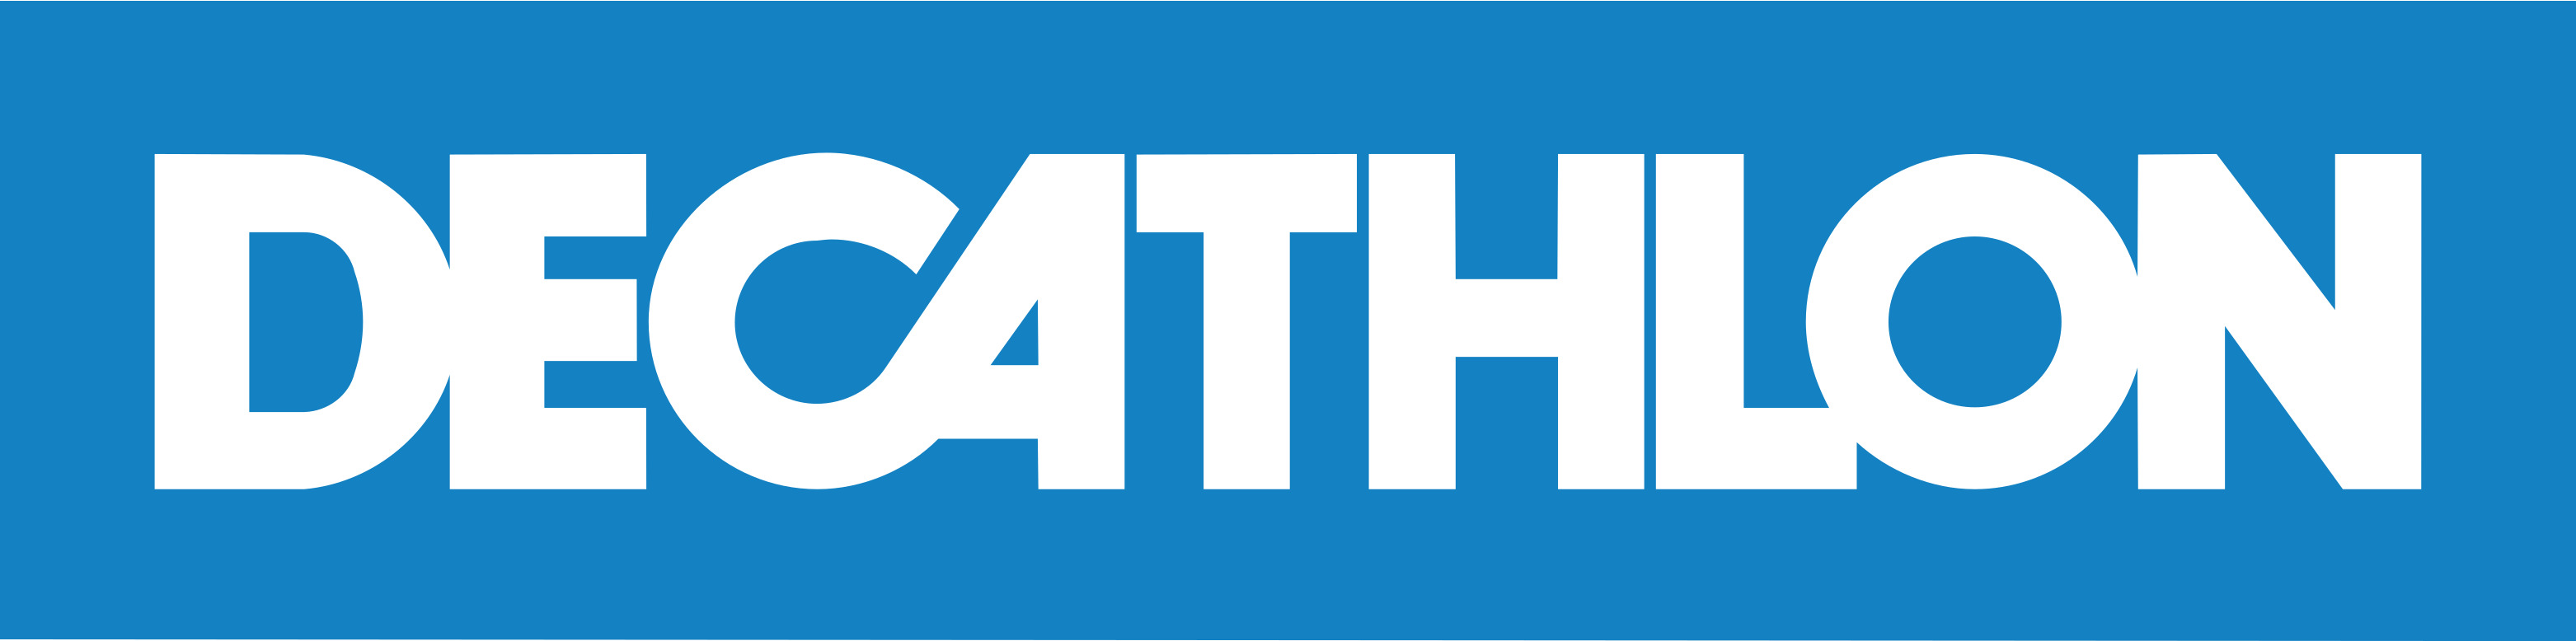
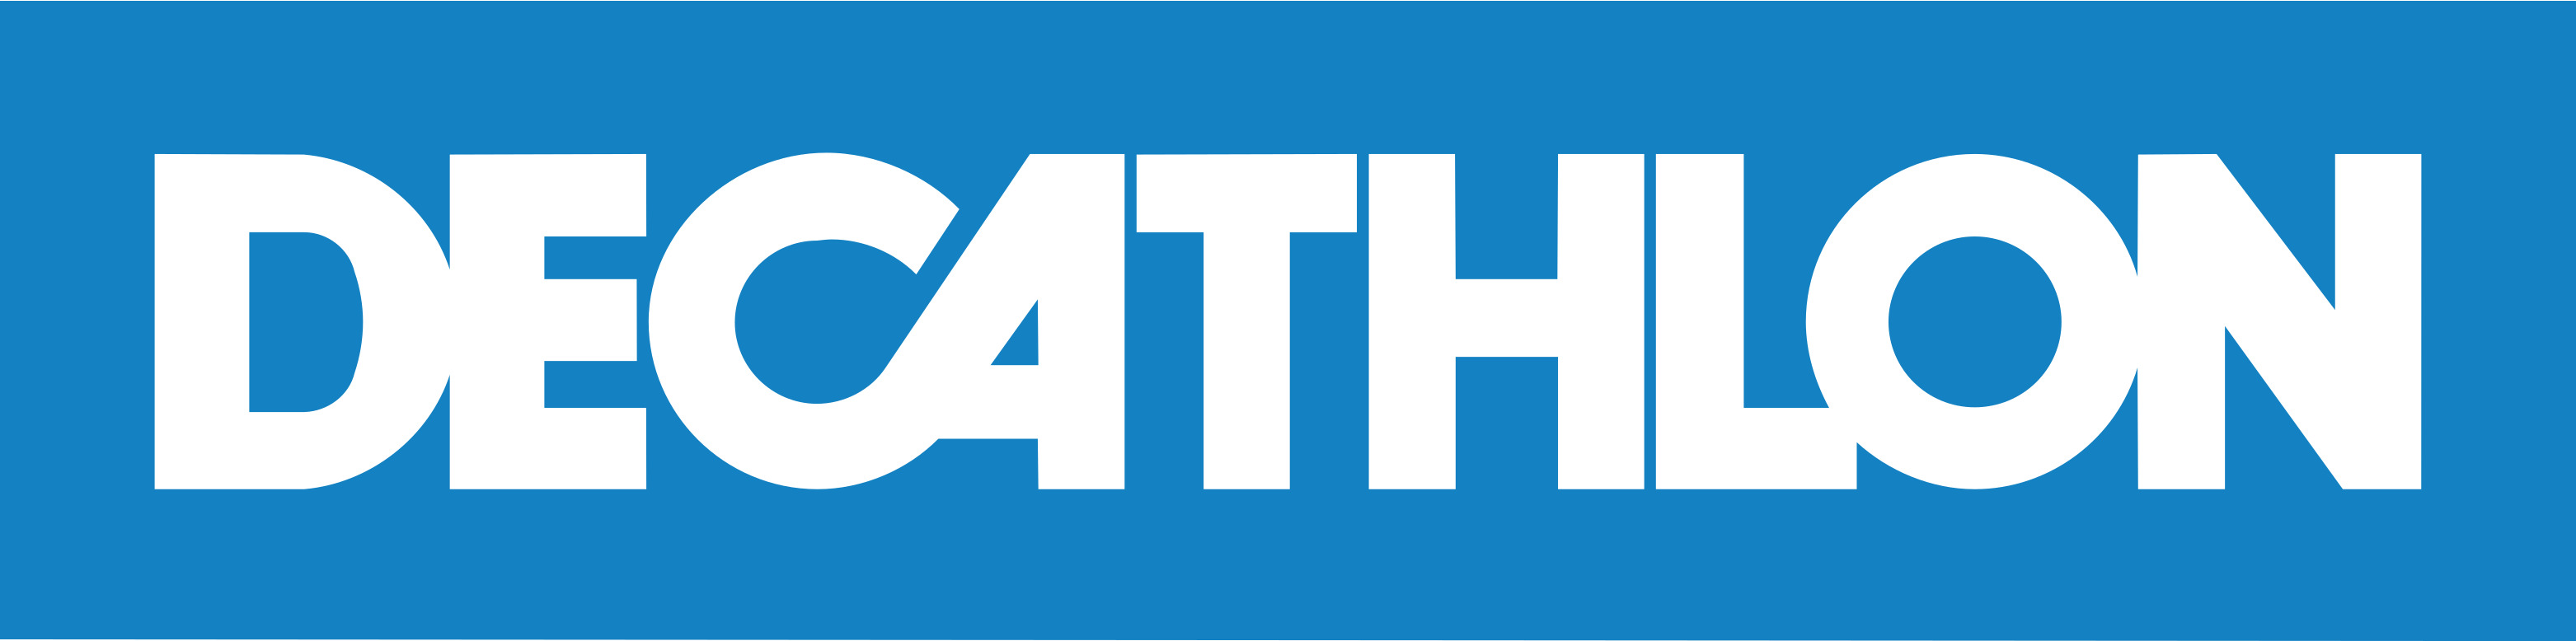
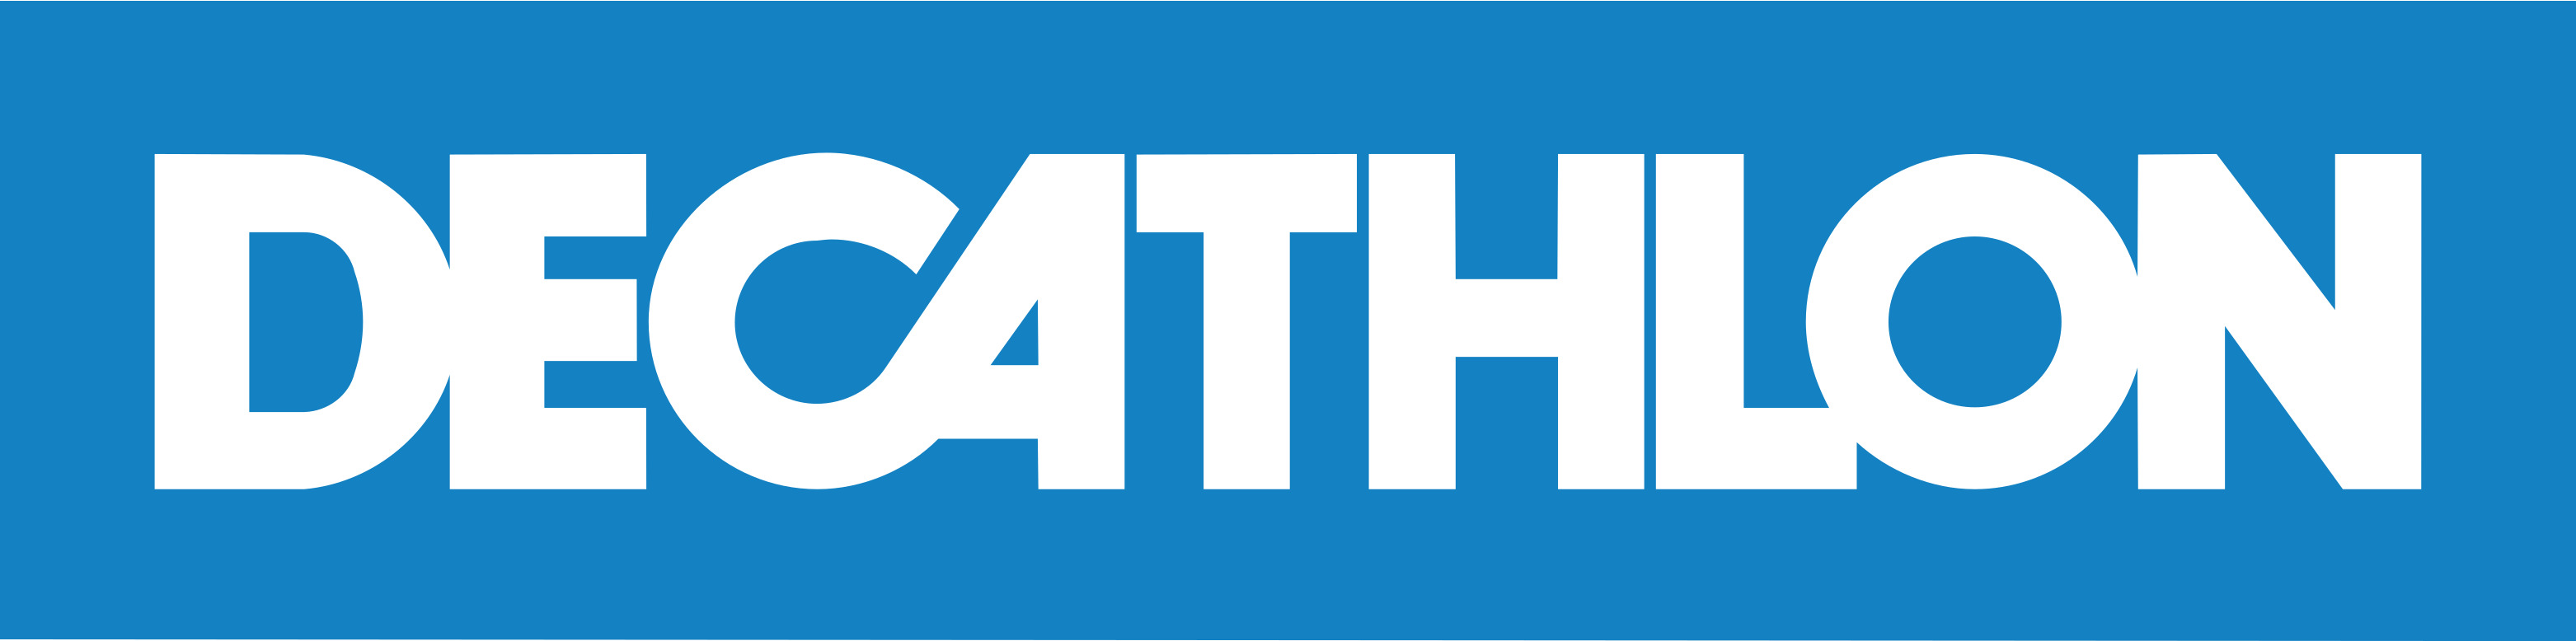
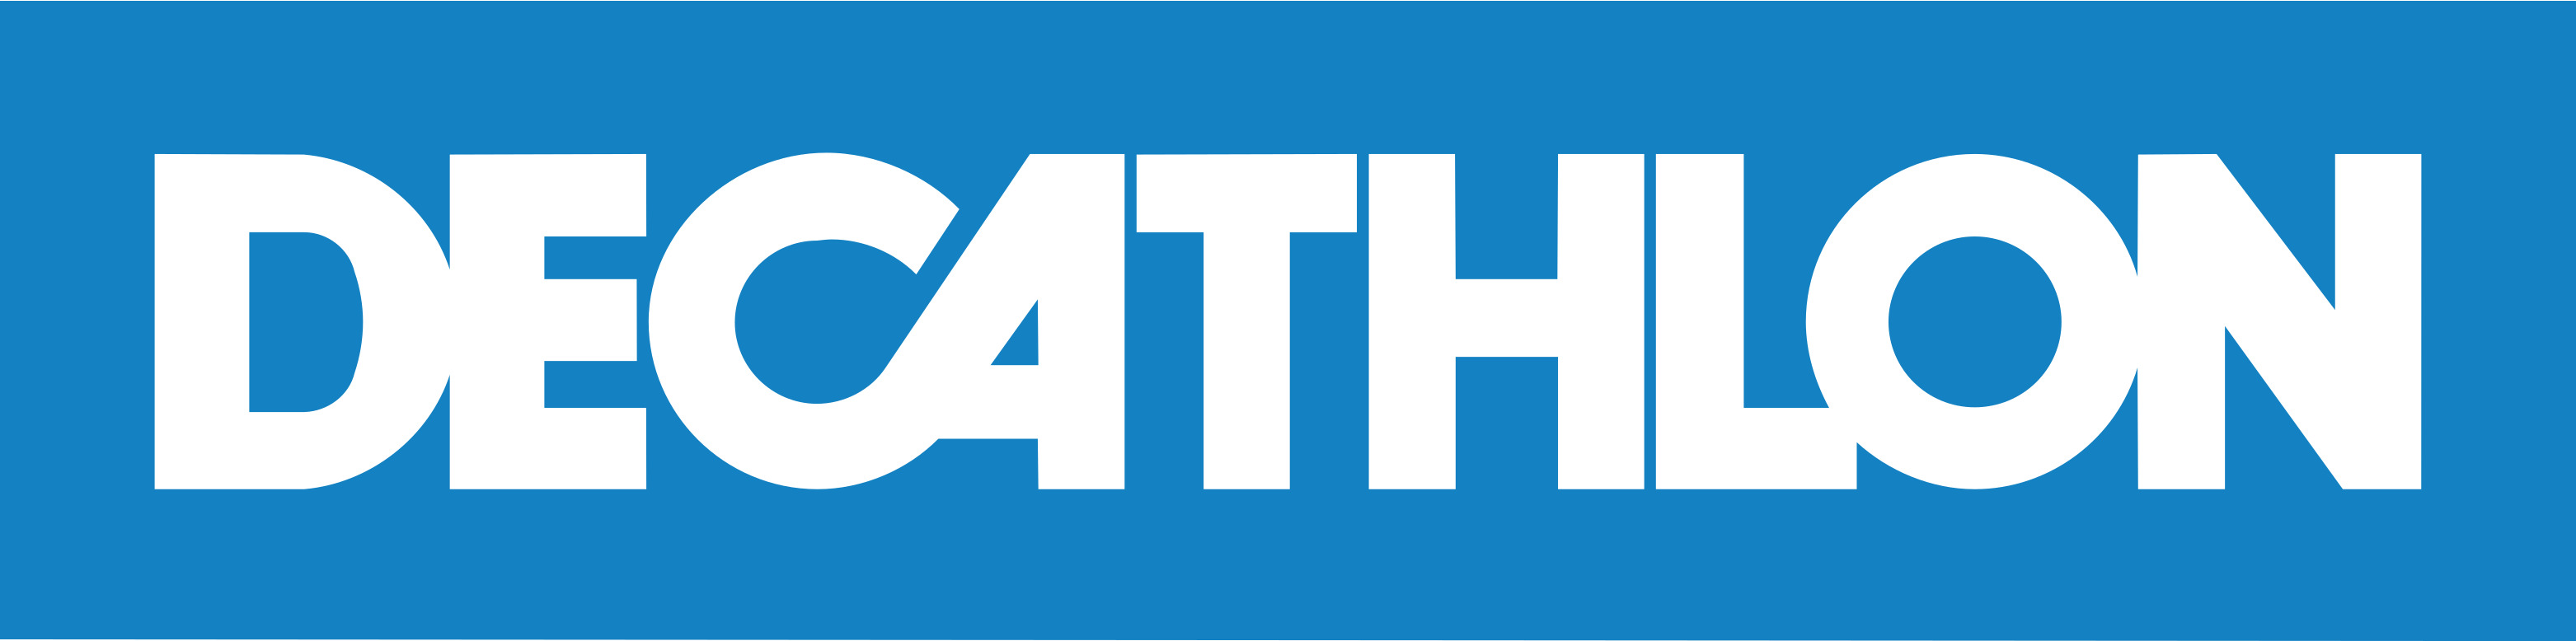
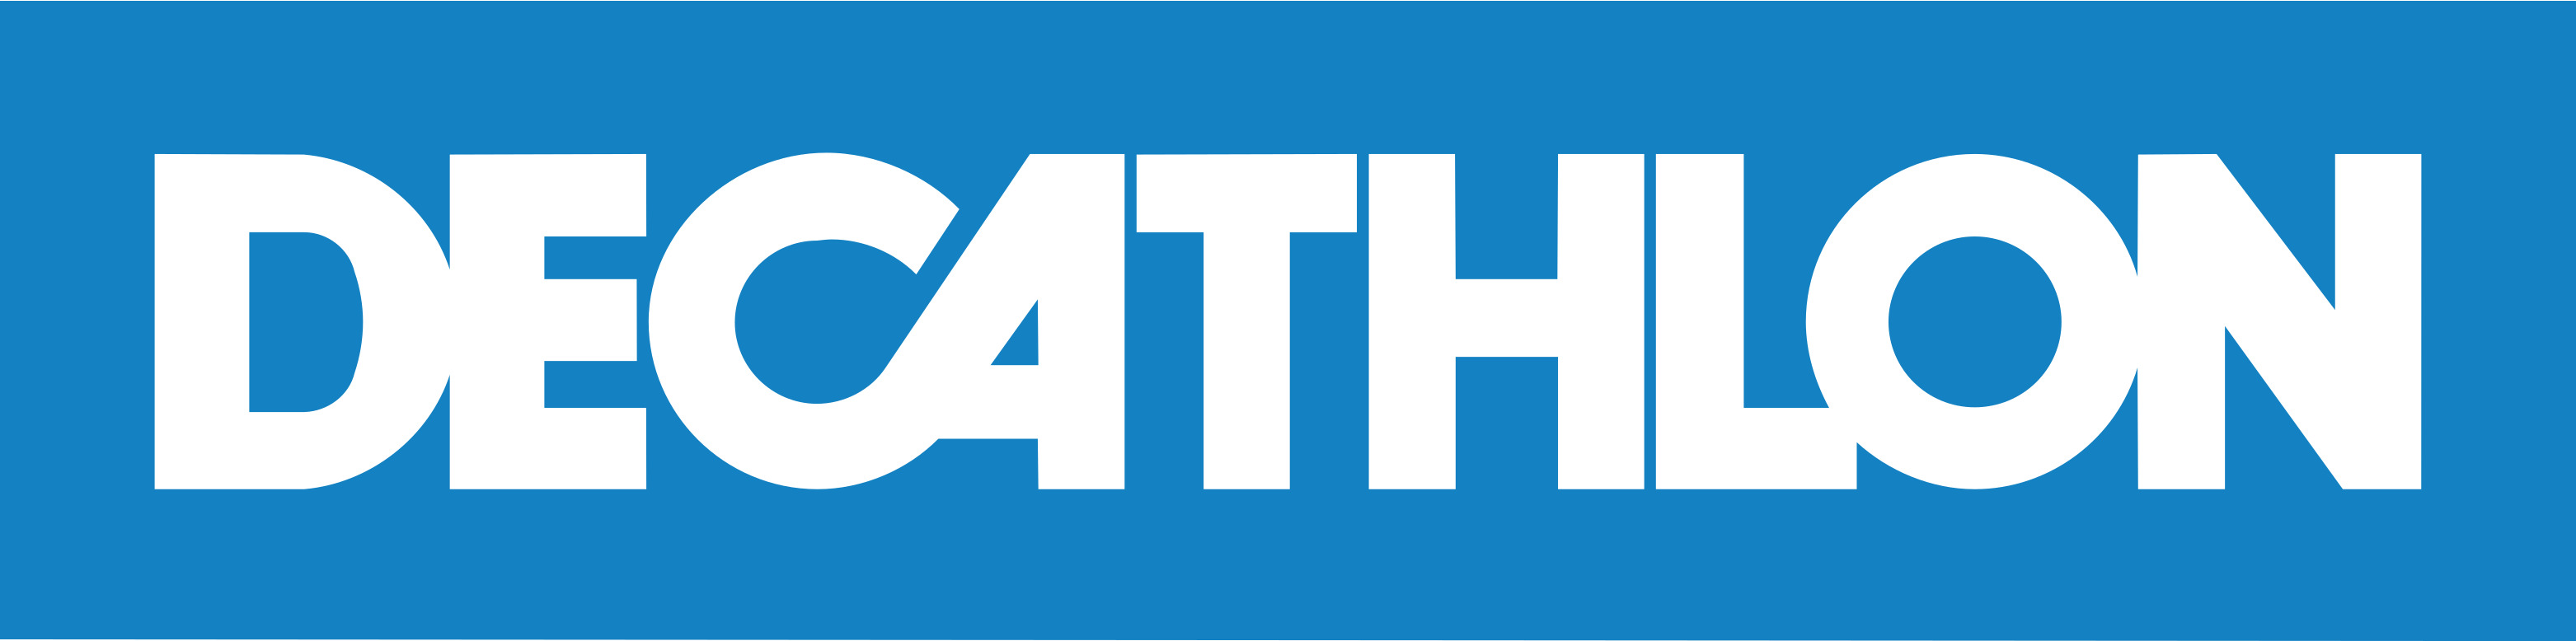
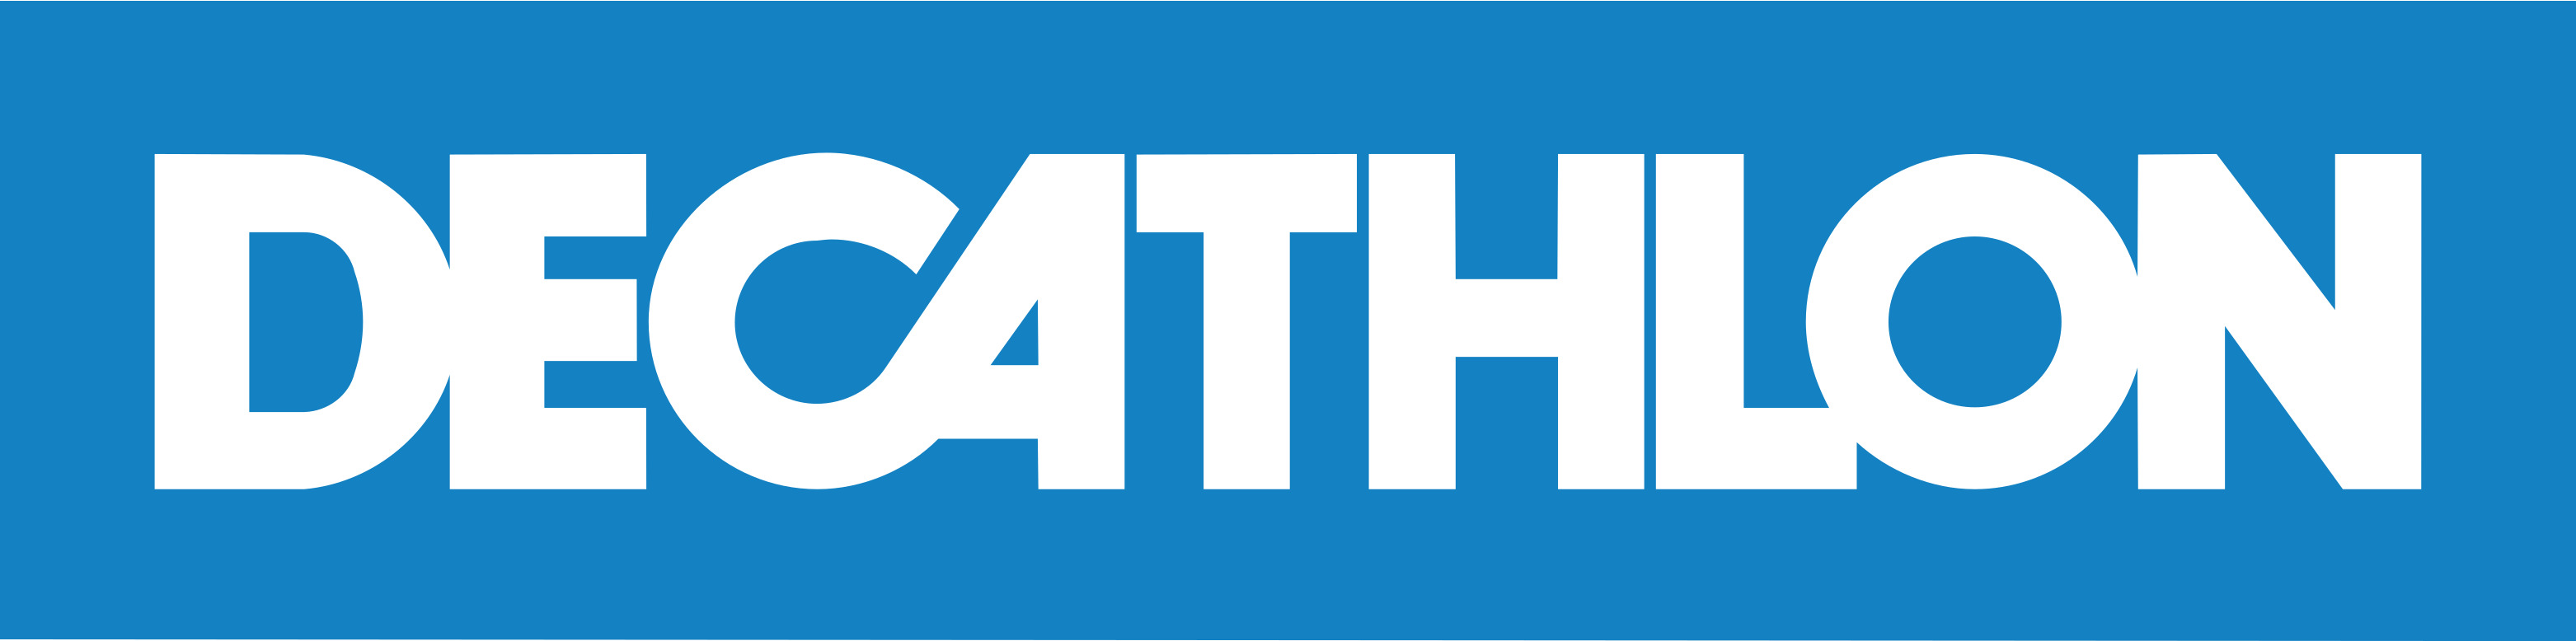
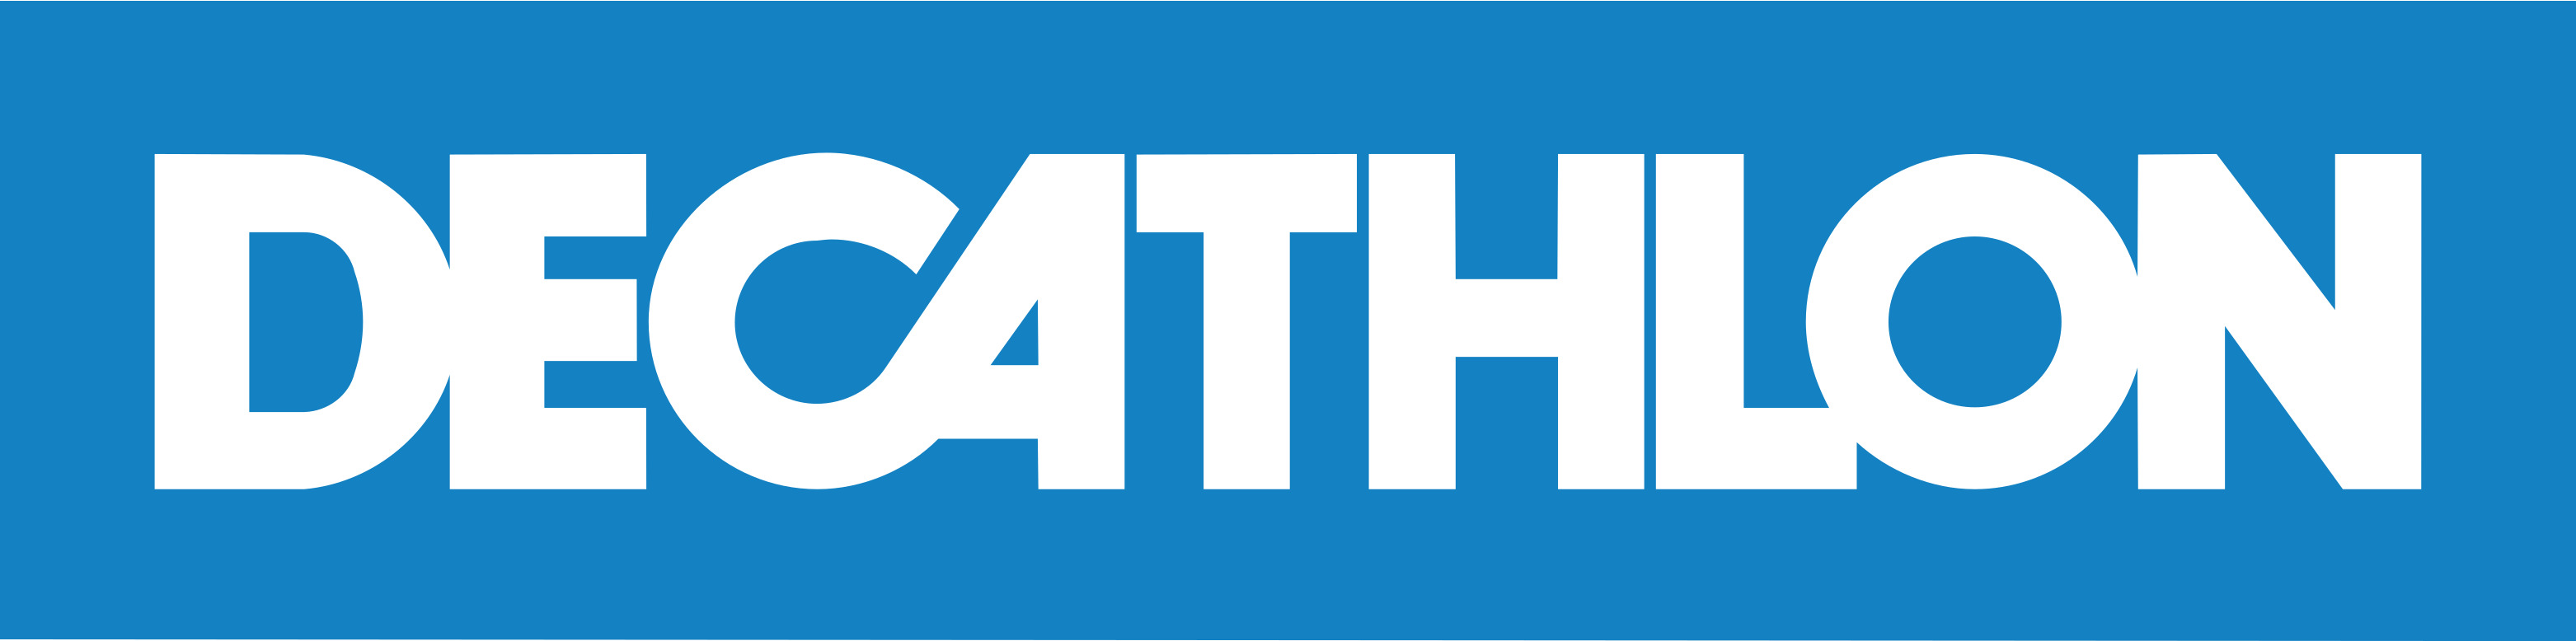
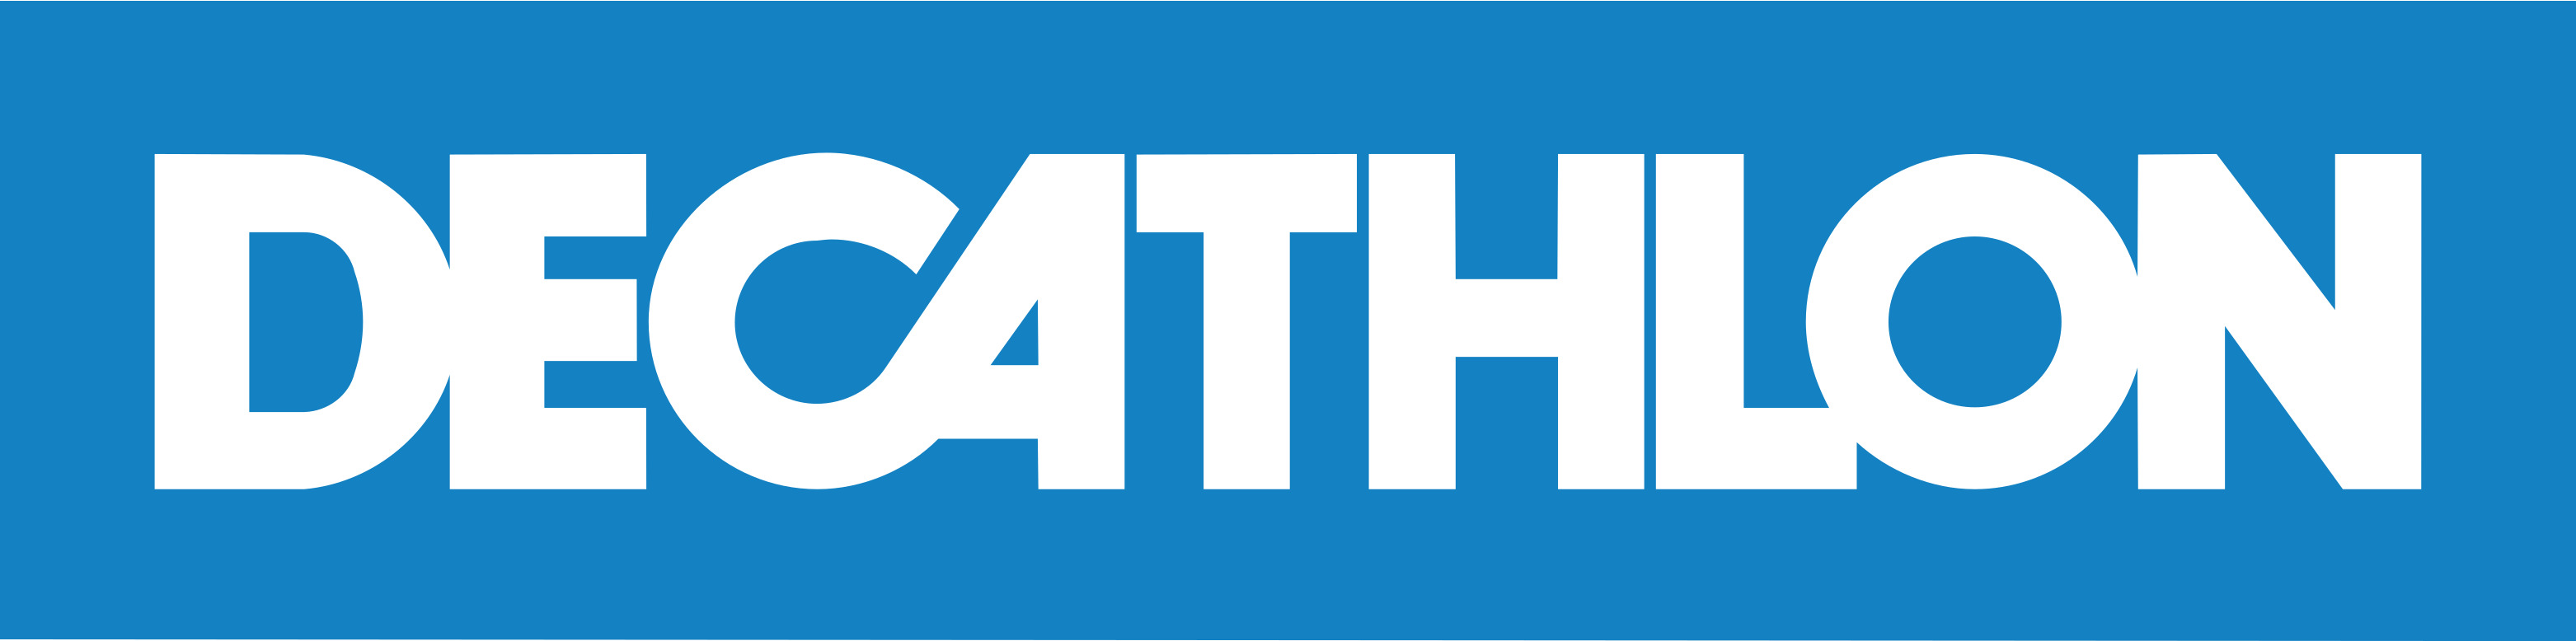
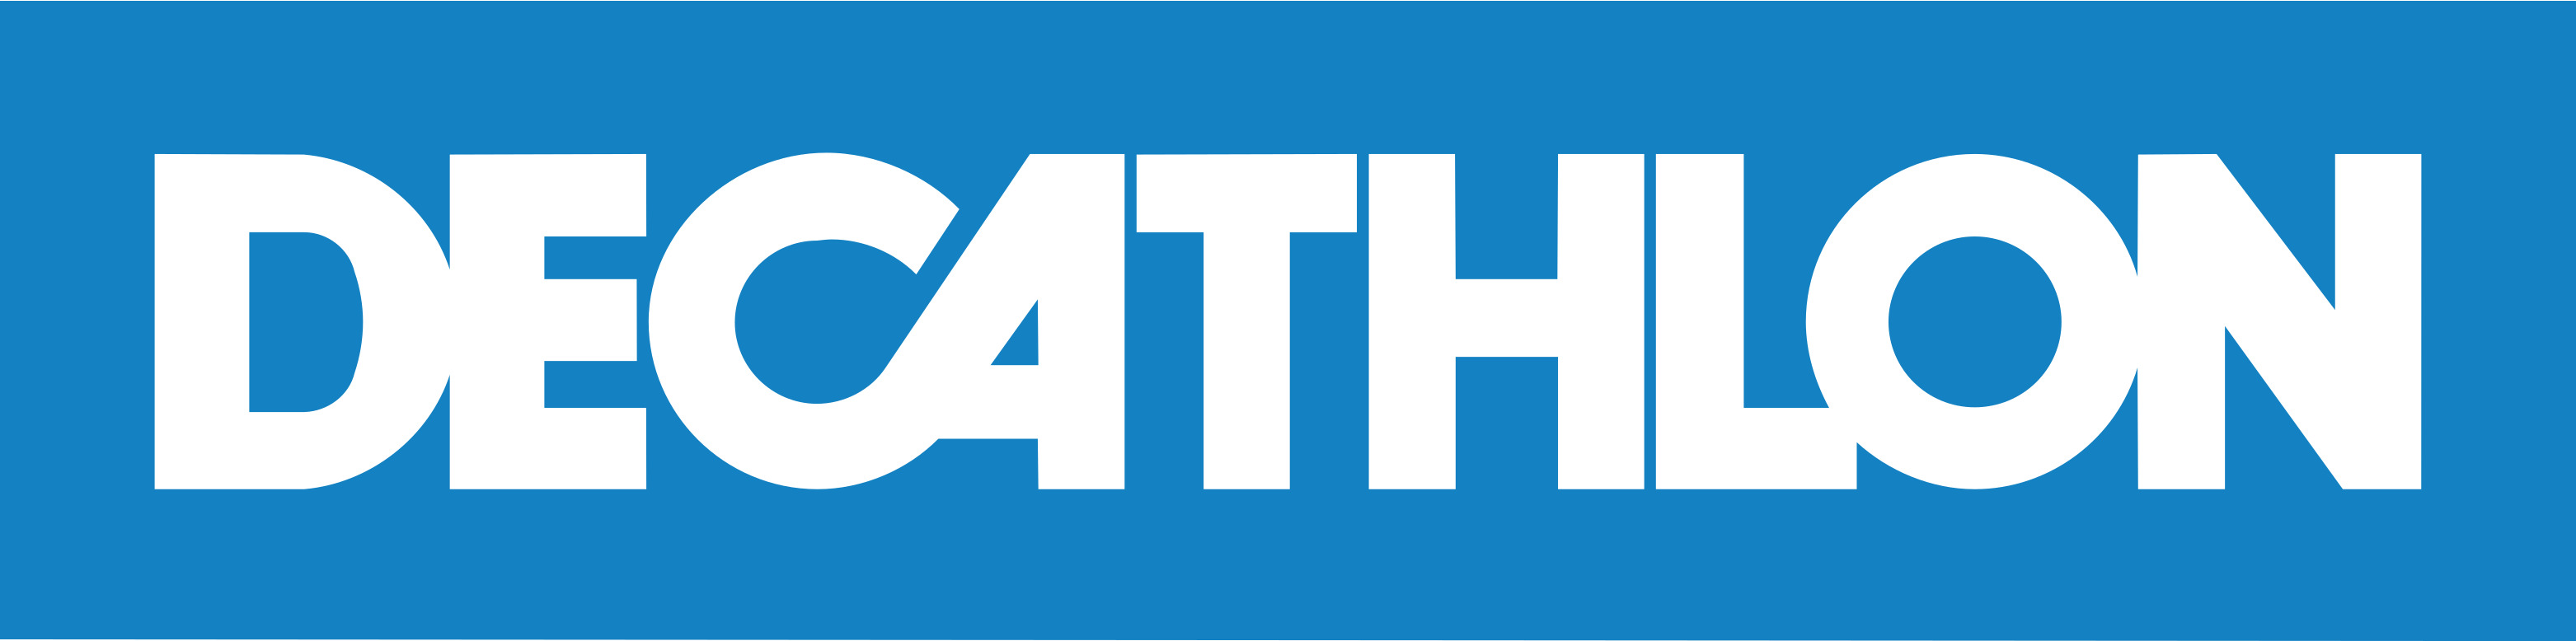
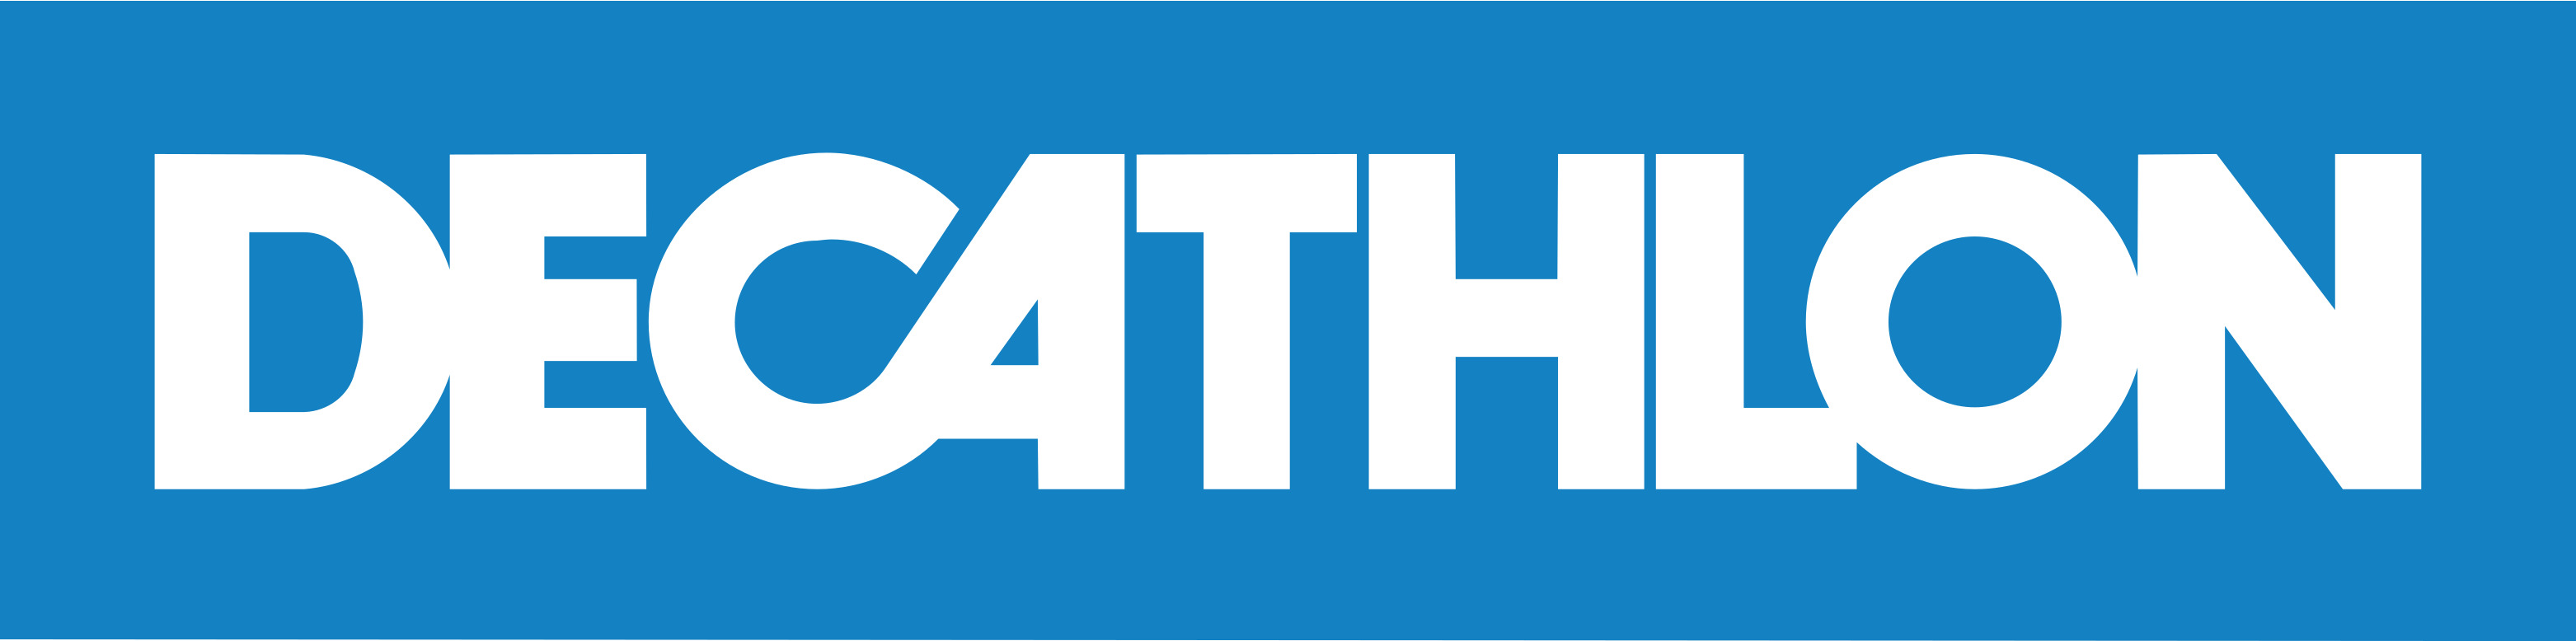
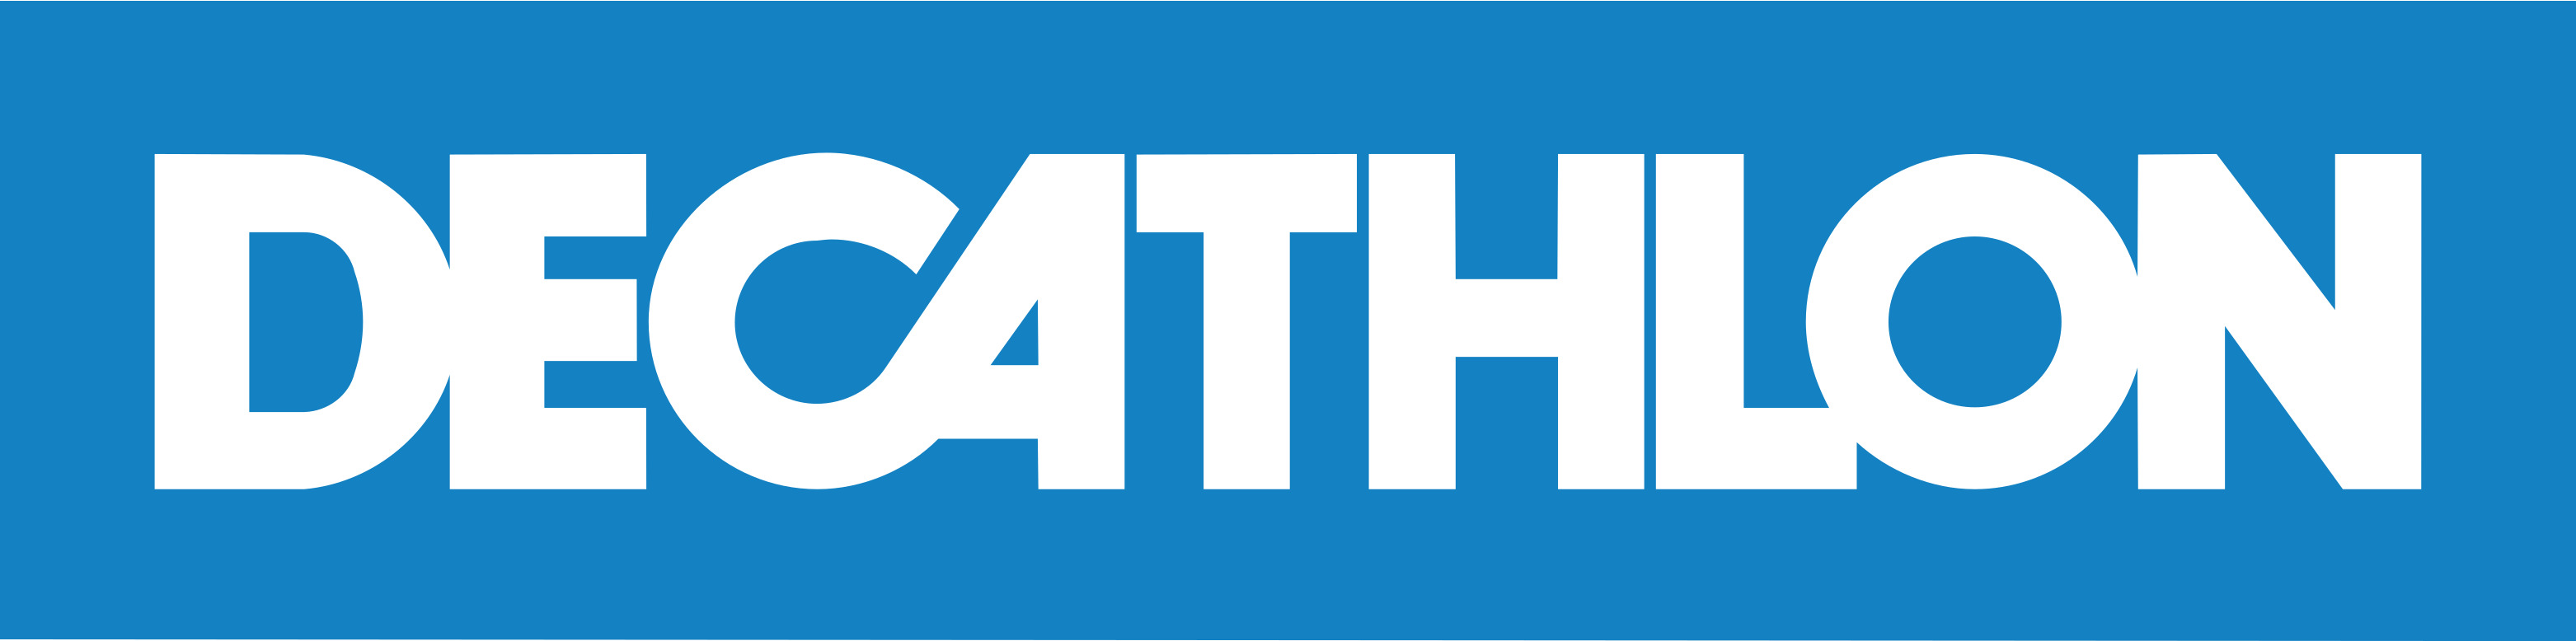

In [50]:
import folium

l_fg = [
    fg_geom_d4, 
    fg_points, 
    fg_circles,
    # fg_join,
    fg_over, 
    # fg_overlay, 
    # fg_overlay_all, 
      fg_inside,fg_partly,
    #  fg_outside
    ]

m=folium.Map()
for fg in l_fg:
    fg.add_to(m)
folium.LayerControl(position='topright',collapsed=False).add_to(m)

m.fit_bounds(m.get_bounds())
m

# `MONSTER CODE`

In [ ]:
gdf_intersection.columns

Index(['url', 'name', 'active', 'address', 'location', 'lat', 'lon', 'rect',
       'marker', 'fg', 'point', 'GADM_1', 'GADM_2', 'GADM_3', 'GADM_4',
       'store', 'geometry'],
      dtype='object')

In [ ]:
gdf_intersection = gdf_store_circles.copy().set_crs(epsg=4326)
gdf_circle_6933 = gdf_intersection.to_crs(epsg=6933)

In [ ]:

l_fg = []
num_inside_towns, num_partly_towns = 0, 0
sum_ewz,sum_kfl, sum_area_geom_int = 0, 0, 0
sum_int_kfl, sum_int_ewz, sum_int_geom = 0, 0, 0


# l_fg_point, l_fg_circle, l_fg_merged = []
# l_fg_inside, l_fg_partly = []


fg_circle = folium.FeatureGroup(name=f'Circles [r={radius_km} Km, Area={round(3.1415 * radius_km**2, 2)} Km2]')
fg_join = folium.FeatureGroup(name=f'Intersections')
fg_inside = folium.FeatureGroup(name=f'Markers - Inside towns')
fg_partly = folium.FeatureGroup(name=f'Markers - Partly towns')
fg_outside = folium.FeatureGroup(name=f'Markers - Outside towns')
fg_overlay = folium.FeatureGroup(name=f'Overlay - Summary inside')

l_gdf_circles = []
l_gdf_merged_circles = []


for i,center_point in enumerate(l_center_points):
    lon = center_point[1]
    lat = center_point[0]
    geom_center_point = geometry.Point(lon, lat)

    # Convert the Shapely circle to a geoDataFrame
    poly_circle = f_maps.circle_around_lat_lon_point(
        lon=lon, lat=lat, radius=1000 * radius_km)
    gdf = gpd.GeoSeries([poly_circle])
    gdf_intersection = gdf.to_frame(name='geometry').set_crs(epsg=4326)
    gdf_circle_6933 = gdf_intersection.to_crs(epsg=6933)
    l_gdf_circles.append(gdf_circle_6933.iloc[0].geometry)

    # Generate the FeatureGroup and add it to the list
    # fg_circle = folium.FeatureGroup(name=f'Circle [lat={lat}, lon ={lon}, r={radius_km} Km]')
    gjson_circle = folium.GeoJson(gdf_intersection, color='red')
    gjson_circle.add_to(fg_circle)
    # l_fg_circle.append(fg_circle)

    ############# INTERSECTION ####################
    gdf_join = gpd.sjoin(gdf_geom_4326, gdf_intersection, 
                        how="inner", predicate="intersects") #\
                            # .drop(l_cols_non_serializable, axis=1)
                            # 

    gdf_join['KFL_GPD'] = round(gdf_geom_6993.geometry.area / 10**6, 2)
    int_kfl = gdf_join.KFL.sum()
    int_ewz =gdf_join.EWZ.sum()
    int_geom = round(gdf_join.KFL_GPD.sum(), 2)
    sum_int_kfl += int_kfl
    sum_int_ewz += int_ewz
    sum_int_geom += int_geom

    print(f'int_kfl={int_kfl}Km2, int_geom={int_geom}Km2, int_ewz={int_ewz}')

    gjson = f_maps.get_folium_geojson(gdf_join, 
                                    fields=['GEN', 'EWZ', 'KFL', 'KFL_GPD'],
                                        aliases = ['Name', 'Population', 'Area_KFL', 'Area_Geom'])
    gjson.add_to(fg_join)

    ############# OVERLAY / individual ####################

    col_perc = 'PERC_int'

    # Set the column used for NORMALIZATION (denominator)
    gdf_geom_6993['area_geom'] = round(gdf_geom_6993['geometry'].area / 10**6, 2)
    # Overlay geometry with polygon  
    gdf_intersection = gpd.overlay(gdf_geom_6993, gdf_circle_6933, how='intersection')

    # Set the column used for NORMALIZATION (numerator)
    gdf_intersection['area'] = round(gdf_intersection['geometry'].area / 10**6, 2)
    gdf_intersection[col_perc] = gdf_intersection['area'] / gdf_intersection['area_geom']
    
    
    d_columns = {
        'area_geom':{'alias' : 'area',        'is_norm': True,  'is_int':False},
        'KFL':     {'alias' : 'area_data',    'is_norm': True,  'is_int':False},
        'EWZ':     {'alias' : 'Population',   'is_norm': True,  'is_int':True}
    }
    
    gdf_intersection = f_maps.overlay_shapes(gdf_circle=gdf_intersection, 
                                        col_perc=col_perc, 
                                        d_columns=d_columns)


    # ################### Distance to point of interest ##########
    gdf = pd.DataFrame(gdf_intersection[['ARS','lat','lon','PERC_int','GEN']])
    gdf = gpd.GeoDataFrame(gdf, crs='epsg:4326', 
                        geometry=[geometry.Point(xy) for xy in zip(gdf['lon'], gdf['lat'])])
    gdf = f_maps.compute_dist_to_lat_lon(gdf, lon=geom_center_point.x, lat=geom_center_point.y, round_dec=2, units='km')

    #######################  Gemeinde Markers  ##########################
    
    gdf_inside = gdf[gdf[col_perc] == 1.0]
    num_inside_towns += gdf_inside.shape[0]
    print(f'Inside ={ gdf_inside.shape[0]}')
    fg_inside_circle = f_maps.get_markers_polygon(gdf_inside,
                                            l_tooltip=['GEN','dist'], 
                                            name=f'Markers inside {gdf_inside.shape[0]}', color='darkgreen')
    fg_inside_circle.add_to(fg_inside)

    gdf_partly = gdf[gdf[col_perc] != 1.0]
    num_partly_towns += gdf_partly.shape[0]
    fg_partly_circle = f_maps.get_markers_polygon(gdf_partly, 
                                            l_tooltip=['GEN','dist'], 
                                            name=f'Markers partly {gdf_partly.shape[0]}', color='orange')
    fg_partly_circle.add_to(fg_partly)


    # gdf_outside = gdf[gdf[col_perc] != 1.0]
    
    ############# OVERLAY / merged ####################

    l_cols_percentaged = ['area_geom', 'EWZ', 'KFL']
    gdf_merge = f_maps.merge_shapes(gdf_intersection, l_col_percs=l_cols_percentaged,
                                    d_percs={'data':'KFL', 'geom':'area_geom'}, 
                                    num_dec=round_dec, is_logging=True)

    gdf_merge['num_in'] = gdf_inside.shape[0]
    gdf_merge['num_part'] = gdf_partly.shape[0]

    l_gdf_merged_circles.append(gdf_merge)
    
    gjson = f_maps.get_folium_geojson(
        gdf_merge, 
        fields=[
            'perc_data', 
            'KFL_int', 'KFL',
            'perc_geom',
            'area_geom_int', 'area_geom',
            'EWZ_int', 'EWZ',
            'num_in', 'num_part', 
            ],
        aliases = [
            'Percentage data', 
            'Area_data intersection [Km2]', 'Area_data shape [Km2]',
            'Percentage geometry',
            'Area_geom intersection [Km2]', 'Area_geom shape [Km2]',
            'Population intersection', 'Population shape',
            '# Localities inside', 
            '# Localities partially inside',
            ])
    gjson.add_to(fg_overlay)
    sum_ewz += gdf_merge['EWZ_int'].sum()
    sum_kfl += gdf_merge['KFL_int'].sum()
    sum_area_geom_int += gdf_merge['area_geom_int'].sum()
    print(f'area_geom_int= {sum_area_geom_int}\n')

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\shapely\ops.py:274: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  return type(geom)(zip(*func(*zip(*geom.coords))))


int_kfl=0.0Km2, int_geom=47661.49Km2, int_ewz=0.0
Inside =0
area_geom = 0.0
area_geom_int = 0.0
EWZ = 0
EWZ_int = 0
KFL = 0
KFL_int = 0.0
perc_data = nan
perc_geom = nan
area_geom_int= 0.0



c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\shapely\ops.py:274: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  return type(geom)(zip(*func(*zip(*geom.coords))))


int_kfl=0.0Km2, int_geom=47661.49Km2, int_ewz=0.0
Inside =0
area_geom = 0.0
area_geom_int = 0.0
EWZ = 0
EWZ_int = 0
KFL = 0
KFL_int = 0.0
perc_data = nan
perc_geom = nan
area_geom_int= 0.0

int_kfl=0.0Km2, int_geom=47661.49Km2, int_ewz=0.0


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\shapely\ops.py:274: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  return type(geom)(zip(*func(*zip(*geom.coords))))


Inside =0
area_geom = 0.0
area_geom_int = 0.0
EWZ = 0
EWZ_int = 0
KFL = 0
KFL_int = 0.0
perc_data = nan
perc_geom = nan
area_geom_int= 0.0

int_kfl=0.0Km2, int_geom=47661.49Km2, int_ewz=0.0


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\shapely\ops.py:274: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  return type(geom)(zip(*func(*zip(*geom.coords))))


Inside =0
area_geom = 0.0
area_geom_int = 0.0
EWZ = 0
EWZ_int = 0
KFL = 0
KFL_int = 0.0
perc_data = nan
perc_geom = nan
area_geom_int= 0.0



In [ ]:
gdf_intersection.columns

Index(['OBJID', 'ADE', 'GF', 'BSG', 'ARS', 'AGS', 'SDV_ARS', 'GEN', 'BEZ',
       'IBZ', 'BEM', 'NBD', 'SN_L', 'SN_R', 'SN_K', 'SN_V1', 'SN_V2', 'SN_G',
       'FK_S3', 'NUTS', 'ARS_0', 'AGS_0', 'EWZ', 'KFL', 'DLM_ID', 'EPK',
       'EPK_norm', 'KFL_GPD', 'centroid', 'lat_1', 'lon_1', 'area_geom', 'url',
       'name', 'active', 'address', 'location', 'lat_2', 'lon_2', 'rect',
       'marker', 'fg', 'point', 'GADM_1', 'GADM_2', 'GADM_3', 'GADM_4',
       'store', 'geometry', 'area', 'PERC_int', 'area_geom_int', 'KFL_int',
       'EWZ_int'],
      dtype='object')

In [ ]:

fg_inside.layer_name = fg_inside.layer_name + f'[{num_inside_towns}/{gpd_zensus_filt.shape[0]}]'
fg_partly.layer_name = fg_partly.layer_name + f'[{num_partly_towns}/{gpd_zensus_filt.shape[0]}]'
fg_join.layer_name = fg_join.layer_name + f'[Area={sum_int_kfl}, Area_Geom={round(sum_int_geom,round_dec)}, EWZ={sum_int_ewz} ]'



# area_merged_circ = round(poly_merged_circ.area / 10**6, 3)
fg_overlay.layer_name = fg_overlay.layer_name + f'[Area_geom_int={sum_area_geom_int}, \
                                                    , KFL_int={sum_kfl} \
                                                     EWZ_int={sum_ewz}]'
# fg_circle.layer_name = f'Circles [Radius={radius_km} Km, \
#                                     Area={round(3.1415 * radius_km**2, 2)} Km2]'

In [223]:
l_gdf_circles

[<POLYGON ((1043641.029 5796631.545, 1043493.281 5795243.413, 1043074.219 579...>,
 <POLYGON ((986564.389 5738670.009, 986419.309 5737259.366, 986007.277 573586...>,
 <POLYGON ((968020.724 5805490.762, 967872.554 5804106.124, 967452.38 5802734...>,
 <POLYGON ((967989.589 5805241.335, 967841.43 5803856.599, 967421.288 5802485...>]

In [29]:
geoseries_merged_circ = gpd.GeoSeries(l_gdf_circles)
poly_merged_circ = geoseries_merged_circ.union_all()
# poly_merged_circ

geoseries_all_poly_merged = gpd.GeoSeries([poly_merged_circ])
geoseries_all_poly_merged

gdf_circ_poly_merged = geoseries_all_poly_merged.to_frame(name='geometry').set_crs(epsg=6933)
gdf_circ_poly_merged


# Set the column used for NORMALIZATION (denominator)
gdf_geom_6993['area_geom'] = round(gdf_geom_6993['geometry'].area / 10**6, 2)
# Overlay geometry with polygon  
gdf_overlay_indiv = gpd.overlay(gdf_geom_6993, gdf_circ_poly_merged, how='intersection')

# Set the column used for NORMALIZATION (numerator)
gdf_overlay_indiv['area'] = round(gdf_overlay_indiv['geometry'].area / 10**6, 2)
gdf_overlay_indiv[col_perc] = gdf_overlay_indiv['area'] / gdf_overlay_indiv['area_geom']


d_columns = {
    'area_geom':{'alias' : 'area',        'is_norm': True,  'is_int':False},
    'KFL':     {'alias' : 'area_data',    'is_norm': True,  'is_int':False},
    'EWZ':     {'alias' : 'Population',   'is_norm': True,  'is_int':True}
}

col_perc = 'PERC_int'
gdf_overlay_all = f_maps.overlay_shapes(gdf_circle=gdf_overlay_indiv, 
                                    col_perc=col_perc, 
                                    d_columns=d_columns)
# }
gdf_overlay_all.shape

(28, 37)

In [30]:
pd.set_option('display.max_columns', None)
gdf_overlay_indiv.head(5)

OBJID  ADE  GF  BSG           ARS       AGS       SDV_ARS  \
0  DEBKGVG2000006NB    6   4    1  120610020020  12061020  120610020020   
1  DEBKGVG2000006NC    6   4    1  120610112112  12061112  120610112112   
2  DEBKGVG2000006ND    6   4    1  120610217217  12061217  120610217217   
3  DEBKGVG2000006NF    6   4    1  120610260260  12061260  120610260260   
4  DEBKGVG2000006NJ    6   4    1  120610332332  12061332  120610332332   

                   GEN       BEZ  IBZ BEM NBD SN_L SN_R SN_K SN_V1 SN_V2 SN_G  \
0            Bestensee  Gemeinde   62  --  ja   12    0   61    00    20  020   
1            Eichwalde  Gemeinde   62  --  ja   12    0   61    01    12  112   
2             Heidesee  Gemeinde   62  --  ja   12    0   61    02    17  217   
3  Königs Wusterhausen     Stadt   61  --  ja   12    0   61    02    60  260   
4          Mittenwalde     Stadt   61  --  ja   12    0   61    03    32  332   

  FK_S3   NUTS         ARS_0     AGS_0    EWZ  KFL            DLM_ID  \
0     R  DE406  120610020020  12061020   8932   38  DEBKGDL20000E3MM   
1     R  DE406  120610112112  12061112   6475    2  DEBKGDL20000DZOT   
2     R  DE406  120610217217  12061217   7416  135  DEBKGDL20000E61F   
3     R  DE406  120610260260  12061260  38929   96  DEBKGDL20000E3NO   
4     R  DE406  120610332332  12061332   9854   99  DEBKGDL20000E5P2   

           EPK  EPK_norm  KFL_GPD        lat        lon  area_geom  \
0   235.052632       0.0    37.58  52.229444  13.643768      37.58   
1  3237.500000       0.0     2.83  52.372860  13.623927       2.83   
2    54.933333       0.0   136.12  52.247037  13.769812     136.12   
3   405.510417       0.0    95.82  52.314088  13.677780      95.82   
4    99.535354       0.0    99.28  52.248860  13.550094      99.28   

                                            geometry    area  PERC_int  \
0  POLYGON ((1315765.576 5796186.923, 1315811.148...   37.58  1.000000   
1  POLYGON ((1315435.222 5805593.956, 1316236.958...    2.83  1.000000   
2  POLYGON ((1331632.52 5800945.781, 1332180.624 ...  132.85  0.975977   
3  POLYGON ((1323821.412 5806531.436, 1323934.628...   95.82  1.000000   
4  POLYGON ((1303626.156 5801804.117, 1305605.291...   99.28  1.000000   

   area_geom_int     KFL_int  EWZ_int  
0          37.58   38.000000     8932  
1           2.83    2.000000     6475  
2         132.85  131.756906     7237  
3          95.82   96.000000    38929  
4          99.28   99.000000     9854

In [ ]:
# mask1 = gdf_geom_4326['ARS'].isin(gdf_overlay_indiv['ARS'])
# gdf_markers_intersect = gdf_geom_4326[mask1]


# gdf_markers_intersect['lat'] = gdf_markers_intersect.geometry.centroid.y
# gdf_markers_intersect['lon'] = gdf_markers_intersect.geometry.centroid.x
# gdf_markers_intersect = gdf_markers_intersect.to_crs(epsg=4326)
# gdf_markers_intersect = gpd.GeoDataFrame(gdf_markers_intersect, crs='epsg:4326', 
#                         geometry=[geometry.Point(xy) for xy in zip(gdf_markers_intersect['lon'], gdf_markers_intersect['lat'])])

# gdf_markers_intersect = pd.DataFrame(gdf_markers_intersect[['ARS','lat','lon','GEN','geometry']])

# gdf_markers_intersect = f_maps.compute_dist_to_lat_lon(gdf_markers_intersect, lon=center_point.x, lat=center_point.y, round_dec=2, units='km')
# # gdf_partly = gdf[gdf[col_perc] != 1.0]
# # num_partly_towns += gdf_partly.shape[0]
# # fg_partly_circle = f_maps.get_markers_polygon(gdf_partly, 
# #                                             name=f'Markers Inside {gdf_partly.shape[0]}', 
#                                               l_tooltip=['GEN','dist'], 
# #                                             color='orange')
# # fg_partly_circle.add_to(fg_partly)
# gdf_markers_intersect.head(5)

In [ ]:
mask1 = ~gdf_geom_4326['ARS'].isin(gdf_overlay_indiv['ARS'])
gdf_outside = gdf_geom_4326[mask1]


gdf_outside['lat'] = gdf_outside.geometry.centroid.y
gdf_outside['lon'] = gdf_outside.geometry.centroid.x
gdf_outside = gdf_outside.to_crs(epsg=4326)
gdf_outside = gpd.GeoDataFrame(gdf_outside, crs='epsg:4326', 
                        geometry=[geometry.Point(xy) for xy in zip(gdf_outside['lon'], gdf_outside['lat'])])
gdf_outside = pd.DataFrame(gdf_outside[['ARS','lat','lon','GEN','geometry']])

gdf = f_maps.compute_dist_to_lat_lon(gdf_outside, lon=geom_center_point.x, lat=geom_center_point.y, round_dec=2, units='km')

fg_outside = f_maps.get_markers_polygon(gdf_outside,
                                            name=f'Markers outside [{gdf_outside.shape[0]}/{gdf_geom_4326.shape[0]}]', 
                                            l_tooltip=['GEN','dist'], 
                                            color='red')

C:\Users\User\AppData\Local\Temp\ipykernel_8440\4021705972.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_outside['lat'] = gdf_outside.geometry.centroid.y
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\User\AppData\Local\Temp\ipykernel_8440\4021705972.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_outside['lon'

In [34]:


############# OVERLAY / merged ####################

l_cols_percentaged = ['area_geom', 'EWZ', 'KFL']
gdf_merge = f_maps.merge_shapes(gdf_overlay_all, l_col_percs=l_cols_percentaged,
                                d_percs={'data':'KFL', 'geom':'area_geom'}, 
                                num_dec=round_dec, is_logging=True)

gdf_merge['num_in'] = gdf_inside.shape[0]
gdf_merge['num_part'] = gdf_partly.shape[0]

l_gdf_merged_circles.append(gdf_merge)


exploded_gdf = gdf_circ_poly_merged.explode()
fg_overlay_all = folium.FeatureGroup(name=f'Overlay all [elems={len(l_gdf_circles)}, merged_elems={len(exploded_gdf)}' + \
                                    f'KFL_int={gdf_merge.KFL_int.sum()} km2,' + \
                                    # 'KFL={gdf_merge.KFL.sum()},' + \
                                    f'Area_geom_int={gdf_merge.area_geom_int.sum()} km2,' + \
                                    # 'Area_Geom={gdf_merge.area_geom.sum()},' + \
                                    f'EWZ_int={gdf_merge.EWZ_int.sum()},' 
                                    # 'EWZ={gdf_merge.EWZ.sum()} ]' + \
                                    )
gjson = f_maps.get_folium_geojson(
    gdf_merge, 
    fields=[
        'perc_data', 
        'KFL_int', 'KFL',
        'perc_geom',
        'area_geom_int', 'area_geom',
        'EWZ_int', 'EWZ',
        'num_in', 'num_part', 
        ],
    aliases = [
        'Percentage data', 
        'Area_data intersection [Km2]', 'Area_data shape [Km2]',
        'Percentage geometry',
        'Area_geom intersection [Km2]', 'Area_geom shape [Km2]',
        'Population intersection', 'Population shape',
        '# Localities inside', 
        '# Localities partially inside',
        ])
gjson.add_to(fg_overlay_all)

area_geom = 1811.69
area_geom_int = 1024.78
EWZ = 329298
EWZ_int = 236771
KFL = 1798
KFL_int = 1015.57
perc_data = 0.56
perc_geom = 0.57


In [ ]:
l_fg = [
    # fg_geom, 
    fg_point, fg_circle, fg_join, 
    fg_overlay, fg_overlay_all, 
      fg_inside,fg_partly,
     fg_outside
    ]

In [36]:
import folium.map


m=folium.Map()
for fg in l_fg:
    fg.add_to(m)
folium.LayerControl(position='topright',collapsed=False).add_to(m)
# m.add_child(folium.LatLngPopup())

m.fit_bounds(m.get_bounds())
m

In [255]:
l_center_points

[(48.571556799999996, 13.411107488728138),
 (48.1772356, 11.636493524231454),
 (49.7968187, 9.991076651628369),
 (48.74851765, 11.474635990779575),
 (48.99430015, 12.114484651137118),
 (49.9186009, 10.870414764893027),
 (49.4586512, 11.007126),
 (48.1825015, 11.531027851474287),
 (48.31015835, 11.888688696534885),
 (48.1414277, 11.5627629),
 (48.38234815, 10.930148680000636),
 (47.84962915, 12.090839281548584)]